# replace({np.nan:0}) --> fillna로 바꾸기!!!!!!

# 세미프로젝트_E조(MGP조)

# 4. 독서에 대한 인식 및 도서관 이용실태 파악

#### 활용데이터 : <국민독서실태조사> 성인/학생 _ 2017년, 2019년, 2021년

## 1) 데이터 전처리 

In [1]:
# pandas, numpy 추출
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [5]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

---------------------------------

### - 국민독서실태조사 성인/학생 2017년, 2019년, 2021년 csv파일 불러오기

In [6]:
# csv 파일 불러오기 : pd.read_csv()
temp1 = pd.read_csv('data/2017_Stu.csv',encoding='cp949')
temp2 = pd.read_csv('data/2019_Stu.csv',encoding='cp949')
temp3 = pd.read_csv('data/2021_Stu.csv',encoding='cp949')
temp4 = pd.read_csv('data/2017_Adult.csv',encoding='cp949')
temp5 = pd.read_csv('data/2019_Adult.csv',encoding='cp949')
temp6 = pd.read_csv('data/2021_Adult.csv',encoding='cp949')

In [7]:
# 각 데이터의 컬럼, 데이터 개수 확인
temp1.info()
temp2.info()
temp3.info()
temp4.info()
temp5.info()
temp6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Columns: 123 entries, 학교구분 to 가중치
dtypes: float64(83), int64(40)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Columns: 199 entries, 학교 구분 to 가중치
dtypes: float64(142), int64(57)
memory usage: 4.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Columns: 188 entries, 학교 구분 to 가중치
dtypes: float64(120), int64(68)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 105 entries, 지역 to 가중치
dtypes: float64(71), int64(34)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 163 entries, 지역 to 가중치
dtypes: float64(112), int64(51)
memory usage: 7.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 179 entries, 조사구 유형 to 가중치
dtypes: float64(114), int64(65)
memory usage: 8.2 MB


## ①학생 독서실태조사 3개년

###  (1)필요한 컬럼값만 추출하여 데이터프레임 형성

 - 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경

In [ ]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경
Stu_2017 = temp1.iloc[:,[0,2,4,8,9,10,11,12,14,15,26,27,30,31,32,33,34,35,36,37,62,63,64,65,66]].fillna(0).astype('int')
Stu_2017.columns = ['학교구분','성별','학교 소재지','평일(시간)','평일(분)','주말(시간)','주말(분)','독서 빈도','독서장애요인1','독서장애요인2','도서 선택시 이용정보1','도서 선택시 이용정보2',
                    '도서 입수경로1','도서 입수경로2','초등 독서분야 선호도1','초등 독서분야 선호도2','초등 독서분야 선호도3','중고등 독서분야 선호도1',
                    '중고등 독서분야 선호도2','중고등 독서분야 선호도3','학교 밖 도서관이용경험','주이용 도서관 종류1','주이용 도서관 종류2','이용 이유','비이용 이유']

In [ ]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경
Stu_2019 = temp2.iloc[:,[0,2,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,28,33,38,43,48,55,56,57,73,74,77,78,79,80,81,82,83,84,115,116,117,118,119,120,121]].fillna(0).astype('int')
Stu_2019.columns = ['학교구분','성별','학교 소재지','종이책 독서 빈도','종이_평일(시간)','종이_평일(분)','종이_주말(시간)','종이_주말(분)',
                    '전자책 독서 빈도','전자_평일(시간)','전자_평일(분)','전자_주말(시간)','전자_주말(분)',
                    '오디오북 이용 빈도','오디오_평일(시간)','오디오_평일(분)','오디오_주말(시간)','오디오_주말(분)',
                    '종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰','독서선호도',
                    '독서장애요인1','독서장애요인2','도서 선택시 이용정보1','도서 선택시 이용정보2','도서 입수경로1','도서 입수경로2',
                    '초등 독서분야 선호도1','초등 독서분야 선호도2','초등 독서분야 선호도3','중고등 독서분야 선호도1',
                    '중고등 독서분야 선호도2','중고등 독서분야 선호도3','학교 밖 도서관이용경험','주이용 도서관 종류1',
                    '주이용 도서관 종류2','월 평균 이용빈도','연 평균 이용빈도','이용 이유','비이용 이유']

In [ ]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경
Stu_2021 = temp3.iloc[:,[0,2,4,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,54,55,58,59,60,61,62,63,64,65,96,97,98,99,100,101,102]].fillna(0).astype('int')
Stu_2021.columns = ['학교구분','성별','학교 소재지','종이_평일(시간)','종이_평일(분)','종이_주말(시간)','종이_주말(분)',
                    '전자_평일(시간)','전자_평일(분)','전자_주말(시간)','전자_주말(분)',
                    '오디오_평일(시간)','오디오_평일(분)','오디오_주말(시간)','오디오_주말(분)','독서 빈도','독서선호도',
                    '독서장애요인1','독서장애요인2','도서 선택시 이용정보1','도서 선택시 이용정보2','도서 입수경로1','도서 입수경로2',
                    '초등 독서분야 선호도1','초등 독서분야 선호도2','초등 독서분야 선호도3','중고등 독서분야 선호도1',
                    '중고등 독서분야 선호도2','중고등 독서분야 선호도3','학교 밖 도서관이용경험','주이용 도서관 종류1',
                    '주이용 도서관 종류2','월 평균 이용빈도','연 평균 이용빈도','이용 이유','비이용 이유']

- 데이터 통합 시 구분을 위해 '연도'컬럼 생성

In [8]:
# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Stu_2017['연도'] = 2017

In [9]:
# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Stu_2019['연도'] = 2019

In [11]:
# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Stu_2021['연도'] = 2021

- 데이터 프레임의 변수 정보 확인

In [12]:
# 컬럼값 확인
Stu_2017.info()
Stu_2019.info()
Stu_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   학교구분           3329 non-null   int32
 1   성별             3329 non-null   int32
 2   학교 소재지         3329 non-null   int32
 3   평일(시간)         3329 non-null   int32
 4   평일(분)          3329 non-null   int32
 5   주말(시간)         3329 non-null   int32
 6   주말(분)          3329 non-null   int32
 7   독서 빈도          3329 non-null   int32
 8   독서장애요인1        3329 non-null   int32
 9   독서장애요인2        3329 non-null   int32
 10  도서 선택시 이용정보1   3329 non-null   int32
 11  도서 선택시 이용정보2   3329 non-null   int32
 12  도서 입수경로1       3329 non-null   int32
 13  도서 입수경로2       3329 non-null   int32
 14  초등 독서분야 선호도1   3329 non-null   int32
 15  초등 독서분야 선호도2   3329 non-null   int32
 16  초등 독서분야 선호도3   3329 non-null   int32
 17  중고등 독서분야 선호도1  3329 non-null   int32
 18  중고등 독서분야 선호도2  3329 non-null   int32
 19  중고등 독서

- 데이터값 표준화

In [13]:
# 연도별 답변 코드와 코드의미가 달라 replace를 통해 코드의미 통일

for i in range(1,3):
    Stu_2017[f'독서장애요인{i}'].replace({4:3,5:4,6:5,7:6,8:7,9:7,10:8,11:9,12:10,13:11},inplace=True)
    Stu_2019[f'독서장애요인{i}'].replace({4:3,5:4,6:5,7:6,8:7,9:7,10:8,11:10,12:11},inplace=True)
    Stu_2021[f'독서장애요인{i}'].replace({3:2,4:3,5:4,6:5,7:6,8:7,9:7,10:8,11:10,12:11},inplace=True)
    Stu_2021[f'도서 입수경로{i}'].replace({6:7,7:10,8:9,9:99},inplace=True)
for i in range(1,4):
    Stu_2017[f'초등 독서분야 선호도{i}'].replace({1:3,2:3,3:2,13:1,14:13,15:14},inplace=True)
    Stu_2019[f'초등 독서분야 선호도{i}'].replace({1:3,2:3,3:2,13:1,14:13,15:14},inplace=True)
    Stu_2021[f'중고등 독서분야 선호도{i}'].replace({3:1,4:3,5:4,6:5,7:6,8:7,9:8,10:9,11:10,12:11,13:12,14:13,15:14},inplace=True)
             
Stu_2017['비이용 이유'].replace({1:7,5:6,6:11,7:12,8:14,9:5,10:9,11:8,12:14,13:14},inplace=True)
Stu_2019['비이용 이유'].replace({1:2,2:3,3:4,4:5,5:6,7:8,8:9,9:10,10:14,11:14},inplace=True)

### (2) 데이터 합치기 : concat()

In [ ]:
# 데이터 통합 후, 인덱스값 재정의

total_stu = pd.concat([Stu_2017,Stu_2019,Stu_2021]).reset_index(drop=True)

In [14]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경
total_stu = total_stu.fillna(0)

In [15]:
# 통합한 데이터 확인
total_stu.tail()
total_stu.info()

,학교구분,성별,학교 소재지,평일(시간),평일(분),주말(시간),주말(분),독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,초등 독서분야 선호도1,초등 독서분야 선호도2,초등 독서분야 선호도3,중고등 독서분야 선호도1,중고등 독서분야 선호도2,중고등 독서분야 선호도3,학교 밖 도서관이용경험,주이용 도서관 종류1,주이용 도서관 종류2,이용 이유,비이용 이유,연도,종이_평일(시간),종이_평일(분),종이_주말(시간),종이_주말(분),전자_평일(시간),전자_평일(분),전자_주말(시간),전자_주말(분),오디오_평일(시간),오디오_평일(분),오디오_주말(시간),오디오_주말(분),독서선호도,월 평균 이용빈도,연 평균 이용빈도
9770,3,2,11,0.0,0.0,0.0,0.0,4,2,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2021,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0
9771,3,2,11,0.0,0.0,0.0,0.0,5,3,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
9772,3,2,11,0.0,0.0,0.0,0.0,5,2,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
9773,3,2,11,0.0,0.0,0.0,0.0,5,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,5,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
9774,3,2,11,0.0,0.0,0.0,0.0,2,7,1,6,10,2,1,0,0,0,9,11,12,2,0,0,0,3,2021,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,2.0,0.0,5.0,0.0,5.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9775 entries, 0 to 9774
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   학교구분           9775 non-null   int32  
 1   성별             9775 non-null   int32  
 2   학교 소재지         9775 non-null   int32  
 3   평일(시간)         9775 non-null   float64
 4   평일(분)          9775 non-null   float64
 5   주말(시간)         9775 non-null   float64
 6   주말(분)          9775 non-null   float64
 7   독서 빈도          9775 non-null   int32  
 8   독서장애요인1        9775 non-null   int32  
 9   독서장애요인2        9775 non-null   int32  
 10  도서 선택시 이용정보1   9775 non-null   int32  
 11  도서 선택시 이용정보2   9775 non-null   int32  
 12  도서 입수경로1       9775 non-null   int32  
 13  도서 입수경로2       9775 non-null   int32  
 14  초등 독서분야 선호도1   9775 non-null   int32  
 15  초등 독서분야 선호도2   9775 non-null   int32  
 16  초등 독서분야 선호도3   9775 non-null   int32  
 17  중고등 독서분야 선호도1  9775 non-null   int32  
 18  중고등 독서분야

### (3) 통합한 데이터 프레임의 데이터값 표준화

In [16]:
total_stu['학교구분'].replace({1:'초등',2:'중등',3:'고등'},inplace=True)
total_stu['성별'].replace({1:'남',2:'여'},inplace=True)
total_stu['학교 소재지'].replace({1:'서울',2:'부산',3:'대구',4:'인천',5:'광주',6:'대전',7:'울산',8:'세종',
                9:'경기', 10:'강원', 11:'충북', 12:'충남', 13:'전북',14:'전남',15:'경북',16:'경남',17:'제주'}, inplace=True)
total_stu['독서 빈도'].replace({1:'매일',2:'일주일에 한두 번',3:'한 달에 한두 번',4:'몇 달에 한번',5:'전혀 읽지 않음',9:'무응답'}, inplace=True)

for i in range(1,3):
    total_stu[f'독서장애요인{i}'].replace({1:'학업 때문에 책읽을시간이 없어서',2:'책읽기가 싫고 습관이 들지않아서',3:'휴대전화,인터넷,텔레비전,게임 등을 이용해서',
                                     4:'어떤 책을 읽을지 몰라서',5:'읽을 만한 책이 없어서',6:'책을 빌릴 곳이 없어서',7:'책을 읽을만한 가정환경이 아니어서',
                                     8:'부모님이 책읽는 것을 공부라고 생각하지 않으셔서',9:'독서가 필요하다고 생각하지 않아서',10:'책을 읽고 이해하기가 어려워서',
                                     11:'기타',98:'없음',99:'무응답'}, inplace=True)
    total_stu[f'도서 선택시 이용정보{i}'].replace({1:'서점, 도서관 등에서 책을 직접 보고',2:'신문이나 잡지의 책 소개, 광고',
                                         3:'텔레비전이나 라디오의 책 소개, 광고',4:'인터넷의 책 소개, 광고',
                                         5:'가족, 선생님, 친구 추천', 6:'유명인, 전문가 추천', 7:'각종 기관의 추천도서',
                                         8:'베스트셀러', 9:'드라마, 영화의 원작', 10:'SNS 책 소개',
                                         11:'유튜브, 책방송 팟캐스트의 책 소개',12:'기타'}, inplace=True)
    total_stu[f'도서 입수경로{i}'].replace({1:'직접 구입', 2:'부모님께서 구입',3:'주위 사람에게 대여',4:'학교 도서관 대여', 5:'학교 밖 도서관 대여', 
                                      6:'도서 대여점에서 대여',7:'집에 있는 책', 8:'구입하지 않고 서점에서 독서',9:'기타',10:'선물받은 책',99:'무응답'}, inplace=True)
    total_stu[f'주이용 도서관 종류{i}'].replace({1:'공공도서관', 2:'작은도서관', 3:'어린이도서관', 4:'기타'}, inplace=True) 
    
for i in range(1,4):
    total_stu[f'초등 독서분야 선호도{i}'].replace({1: '그림책',2:'동시/시',3:'동화/소설',4:'수필', 5:'역사, 위인전', 6:'사회', 7:'과학', 
                    8:'종교', 9:'철학, 논리', 10:'예술, 문화', 11:'취미', 12:'연예, 오락, 스포츠', 13:'자기계발서', 14:'기타'}, inplace=True)
    total_stu[f'중고등 독서분야 선호도{i}'].replace({1: '문학(시/수필)',2:'소설',3:'철학, 사상, 종교', 4:'정치, 사회, 시사', 5:'경제, 경영', 6:'역사, 지리', 
                    7:'예술, 문화', 8:'과학, 기술, 컴퓨터', 9:'가정, 육아, 요리', 10:'어학, 외국어', 11:'연예, 오락, 스포츠, 취미, 여행 ',
                    12:'직업, 취업 관련', 13:'자기계발서', 14:'기타'}, inplace=True)
    

total_stu['학교 밖 도서관이용경험'].replace({1:'있다', 2:'없다'},inplace=True)
total_stu['이용 이유'].replace({1:'독서 및 도서 대출', 2:'숙제에 필요한 자료조사',3:'인터넷 이용', 4:'비디오, 영화 감상', 5:'시험 공부', 6:'행사 참여', 7:'기타' }, inplace=True) 
total_stu['비이용 이유'].replace({1:'책을 잘 읽지 않는다', 2:'학업 등의 이유로 바빠서 이용할 시간이 없다', 3:'집에서 멀다', 4:'주로 학교도서관을 이용한다', 
                            5:'이용 절차가 까다롭다', 6:'책이 낡고, 시설이 쾌적하지 않다', 7:'읽을 만한 책이 없다', 8:'유익한 프로그램이 부족하다', 9:'독서 상담이나 안내자가 안 계신다', 
                         10:'읽고 싶은 책은 사서 읽는다', 11:'원하는 책이 없다', 12:'앉을 자리가 없다', 13:'이용할 필요성을 느끼지 못한다', 14:'기타', 99:'무응답'}, inplace=True)
                                          
                                          
total_stu.독서선호도.replace({1:'매우 좋아한다',2: '약간 좋아한다',3: '보통이다', 4:'약간 싫어한다',5:'매우 싫어한다'}, inplace=True)

total_stu.replace({999:0,99:0,98:'없음'}, inplace=True)

### 연도 데이터 카테고리화

In [17]:
total_stu['연도'] = total_stu['연도'].astype('category')

In [18]:
total_stu.head(10)

,학교구분,성별,학교 소재지,평일(시간),평일(분),주말(시간),주말(분),독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,초등 독서분야 선호도1,초등 독서분야 선호도2,초등 독서분야 선호도3,중고등 독서분야 선호도1,중고등 독서분야 선호도2,중고등 독서분야 선호도3,학교 밖 도서관이용경험,주이용 도서관 종류1,주이용 도서관 종류2,이용 이유,비이용 이유,연도,종이_평일(시간),종이_평일(분),종이_주말(시간),종이_주말(분),전자_평일(시간),전자_평일(분),전자_주말(시간),전자_주말(분),오디오_평일(시간),오디오_평일(분),오디오_주말(시간),오디오_주말(분),독서선호도,월 평균 이용빈도,연 평균 이용빈도
0,초등,남,서울,0.0,0.0,0.0,0.0,일주일에 한두 번,학업 때문에 책읽을시간이 없어서,기타,"서점, 도서관 등에서 책을 직접 보고","가족, 선생님, 친구 추천",부모님께서 구입,집에 있는 책,"연예, 오락, 스포츠",동화/소설,그림책,0,0,0,없다,0,0,0,기타,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,초등,남,서울,0.0,30.0,1.0,0.0,매일,학업 때문에 책읽을시간이 없어서,어떤 책을 읽을지 몰라서,"서점, 도서관 등에서 책을 직접 보고",각종 기관의 추천도서,학교 밖 도서관 대여,부모님께서 구입,동화/소설,동화/소설,사회,0,0,0,있다,작은도서관,공공도서관,독서 및 도서 대출,0,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,초등,남,서울,0.0,50.0,1.0,2.0,일주일에 한두 번,기타,책을 읽고 이해하기가 어려워서,0,0,집에 있는 책,0,"역사, 위인전",사회,"연예, 오락, 스포츠",0,0,0,있다,어린이도서관,0,행사 참여,0,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,초등,남,서울,0.0,40.0,1.0,0.0,일주일에 한두 번,학업 때문에 책읽을시간이 없어서,읽을 만한 책이 없어서,"드라마, 영화의 원작","인터넷의 책 소개, 광고",주위 사람에게 대여,학교 도서관 대여,동화/소설,"연예, 오락, 스포츠",취미,0,0,0,있다,작은도서관,어린이도서관,숙제에 필요한 자료조사,0,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,초등,남,서울,0.0,47.0,0.0,15.0,일주일에 한두 번,기타,책읽기가 싫고 습관이 들지않아서,"서점, 도서관 등에서 책을 직접 보고","가족, 선생님, 친구 추천",학교 도서관 대여,부모님께서 구입,"역사, 위인전","연예, 오락, 스포츠",동화/소설,0,0,0,있다,기타,작은도서관,독서 및 도서 대출,0,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,초등,남,서울,1.0,0.0,2.0,0.0,매일,기타,0,"서점, 도서관 등에서 책을 직접 보고",기타,직접 구입,학교 도서관 대여,동화/소설,"철학, 논리",동화/소설,0,0,0,없다,0,0,0,집에서 멀다,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,초등,남,서울,1.0,0.0,5.0,0.0,매일,어떤 책을 읽을지 몰라서,기타,"서점, 도서관 등에서 책을 직접 보고","가족, 선생님, 친구 추천",직접 구입,구입하지 않고 서점에서 독서,과학,종교,"연예, 오락, 스포츠",0,0,0,있다,어린이도서관,0,기타,0,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,초등,남,서울,0.0,0.0,0.0,0.0,무응답,부모님이 책읽는 것을 공부라고 생각하지 않으셔서,책읽기가 싫고 습관이 들지않아서,"유명인, 전문가 추천","가족, 선생님, 친구 추천",직접 구입,구입하지 않고 서점에서 독서,"연예, 오락, 스포츠",취미,사회,0,0,0,없다,0,0,0,기타,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,초등,남,서울,0.0,45.0,0.0,50.0,일주일에 한두 번,기타,책읽기가 싫고 습관이 들지않아서,"서점, 도서관 등에서 책을 직접 보고",0,도서 대여점에서 대여,학교 도서관 대여,기타,0,0,0,0,0,있다,공공도서관,0,독서 및 도서 대출,0,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,초등,남,서울,0.0,20.0,0.0,0.0,일주일에 한두 번,책읽기가 싫고 습관이 들지않아서,독서가 필요하다고 생각하지 않아서,"인터넷의 책 소개, 광고","서점, 도서관 등에서 책을 직접 보고",부모님께서 구입,주위 사람에게 대여,"연예, 오락, 스포츠",취미,0,0,0,0,없다,0,0,0,기타,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 시간/분으로 나누어져있는 데이터를 분으로 단위 통합

In [19]:
list=['평일','주말','종이_평일','종이_주말','전자_평일','전자_주말','오디오_평일','오디오_주말']
for i in list:
    total_stu[f'{i} 평균 독서시간(분)'] = total_stu[f'{i}(시간)']*60 + total_stu[f'{i}(분)']
    total_stu.drop([f'{i}(시간)',f'{i}(분)'], axis=1, inplace=True)

total_stu.head(5)
total_stu.tail(5)

,학교구분,성별,학교 소재지,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,초등 독서분야 선호도1,초등 독서분야 선호도2,초등 독서분야 선호도3,중고등 독서분야 선호도1,중고등 독서분야 선호도2,중고등 독서분야 선호도3,학교 밖 도서관이용경험,주이용 도서관 종류1,주이용 도서관 종류2,이용 이유,비이용 이유,연도,독서선호도,월 평균 이용빈도,연 평균 이용빈도,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분)
0,초등,남,서울,일주일에 한두 번,학업 때문에 책읽을시간이 없어서,기타,"서점, 도서관 등에서 책을 직접 보고","가족, 선생님, 친구 추천",부모님께서 구입,집에 있는 책,"연예, 오락, 스포츠",동화/소설,그림책,0,0,0,없다,0,0,0,기타,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,초등,남,서울,매일,학업 때문에 책읽을시간이 없어서,어떤 책을 읽을지 몰라서,"서점, 도서관 등에서 책을 직접 보고",각종 기관의 추천도서,학교 밖 도서관 대여,부모님께서 구입,동화/소설,동화/소설,사회,0,0,0,있다,작은도서관,공공도서관,독서 및 도서 대출,0,2017,0.0,0.0,0.0,30.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0
2,초등,남,서울,일주일에 한두 번,기타,책을 읽고 이해하기가 어려워서,0,0,집에 있는 책,0,"역사, 위인전",사회,"연예, 오락, 스포츠",0,0,0,있다,어린이도서관,0,행사 참여,0,2017,0.0,0.0,0.0,50.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0
3,초등,남,서울,일주일에 한두 번,학업 때문에 책읽을시간이 없어서,읽을 만한 책이 없어서,"드라마, 영화의 원작","인터넷의 책 소개, 광고",주위 사람에게 대여,학교 도서관 대여,동화/소설,"연예, 오락, 스포츠",취미,0,0,0,있다,작은도서관,어린이도서관,숙제에 필요한 자료조사,0,2017,0.0,0.0,0.0,40.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0
4,초등,남,서울,일주일에 한두 번,기타,책읽기가 싫고 습관이 들지않아서,"서점, 도서관 등에서 책을 직접 보고","가족, 선생님, 친구 추천",학교 도서관 대여,부모님께서 구입,"역사, 위인전","연예, 오락, 스포츠",동화/소설,0,0,0,있다,기타,작은도서관,독서 및 도서 대출,0,2017,0.0,0.0,0.0,47.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0


,학교구분,성별,학교 소재지,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,초등 독서분야 선호도1,초등 독서분야 선호도2,초등 독서분야 선호도3,중고등 독서분야 선호도1,중고등 독서분야 선호도2,중고등 독서분야 선호도3,학교 밖 도서관이용경험,주이용 도서관 종류1,주이용 도서관 종류2,이용 이유,비이용 이유,연도,독서선호도,월 평균 이용빈도,연 평균 이용빈도,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분)
9770,고등,여,충북,몇 달에 한번,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,약간 싫어한다,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0
9771,고등,여,충북,전혀 읽지 않음,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",책읽기가 싫고 습관이 들지않아서,0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,매우 싫어한다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9772,고등,여,충북,전혀 읽지 않음,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,매우 싫어한다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9773,고등,여,충북,전혀 읽지 않음,어떤 책을 읽을지 몰라서,0,0,0,0,0,0,0,0,0,0,0,없다,0,0,0,이용 절차가 까다롭다,2021,보통이다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9774,고등,여,충북,일주일에 한두 번,책을 읽을만한 가정환경이 아니어서,학업 때문에 책읽을시간이 없어서,"유명인, 전문가 추천",SNS 책 소개,부모님께서 구입,직접 구입,0,0,0,"가정, 육아, 요리","연예, 오락, 스포츠, 취미, 여행","직업, 취업 관련",없다,0,0,0,집에서 멀다,2021,매우 싫어한다,0.0,0.0,0.0,0.0,0.0,0.0,180.0,360.0,120.0,300.0


## ②성인 독서실태조사

###  (1)필요한 컬럼값만 추출하여 데이터프레임 형성

- 필요한 컬럼값만 추출하여 데이터프레임 형성

In [20]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경

Adult_2017 = temp4.iloc[:,[0,2,3,8,9,10,11,12,14,15,26,27,28,29,30,31,33,34,55,56,57,58,59,60,101]].fillna(0).astype('int')
Adult_2017.columns = ['지역','연령','성별','평일(시간)','평일(분)','주말(시간)','주말(분)','독서 빈도','독서장애요인1','독서장애요인2','도서 선택시 이용정보1',
                      '도서 선택시 이용정보2','도서 입수경로1','도서 입수경로2','종이책 선호분야1','종이책 선호분야2',
                      '전자책 선호분야1','전자책 선호분야2','도서관 이용경험','주이용 도서관 종류1','월 평균 이용빈도',
                      '연 평균 이용빈도','이용 목적','비이용 이유','최종학력']

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Adult_2017['연도'] = 2017

In [21]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경

Adult_2019 = temp5.iloc[:,[0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,26,31,36,41,46,54,55,81,82,83,84,85,86,87,88,114,115,116,117,118,119,158,53]].fillna(0).astype('int')
Adult_2019.columns = ['지역','연령','성별','종이책 빈도','종이_평일(시간)','종이_평일(분)','종이_주말(시간)','종이_주말(분)',
                    '전자책 빈도','전자_평일(시간)','전자_평일(분)','전자_주말(시간)','전자_주말(분)',
                    '오디오북 빈도','오디오_평일(시간)','오디오_평일(분)','오디오_주말(시간)','오디오_주말(분)',
                      '종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰','독서장애요인1',
                      '독서장애요인2','도서 선택시 이용정보1','도서 선택시 이용정보2','도서 입수경로1',
                      '도서 입수경로2','종이책 선호분야1','종이책 선호분야2','전자책 선호분야1','전자책 선호분야2',
                      '도서관 이용경험','주이용 도서관 종류1','월 평균 이용빈도','연 평균 이용빈도','이용 목적',
                      '비이용 이유','최종학력','독서 선호도']

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Adult_2019['연도'] = 2019

In [22]:
# 당해 데이터만 도서 종류별 독서 빈도 질문 : 종류별 빈도값 -> 전체 독서 빈도
Adult_2019['독서 빈도'] = Adult_2019[['종이책 빈도','전자책 빈도','오디오북 빈도','종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰']].min(axis=1)
Adult_2019.drop(['종이책 빈도','전자책 빈도','오디오북 빈도','종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰'], axis=1, inplace=True)

In [23]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경

Adult_2021 = temp6.iloc[:,[2,5,6,26,27,28,29,30,31,32,33,34,35,36,37,38,41,42,64,65,66,67,68,69,70,71,97,98,99,100,101,102,103,174,40]].fillna(0).astype('int')
Adult_2021.columns = ['지역','연령','성별','종이_평일(시간)','종이_평일(분)','종이_주말(시간)','종이_주말(분)',
                    '전자_평일(시간)','전자_평일(분)','전자_주말(시간)','전자_주말(분)',
                    '오디오_평일(시간)','오디오_평일(분)','오디오_주말(시간)','오디오_주말(분)','독서 빈도','독서장애요인1','독서장애요인2','도서 선택시 이용정보1',
                      '도서 선택시 이용정보2','도서 입수경로1','도서 입수경로2','종이책 선호분야1','종이책 선호분야2',
                      '전자책 선호분야1','전자책 선호분야2','도서관 이용경험','주이용 도서관 종류1','주이용 도서관 종류2',
                      '월 평균 이용빈도','연 평균 이용빈도','이용 목적','비이용 이유','최종학력','독서 선호도']

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Adult_2021['연도'] = 2021

In [24]:
# 컬럼값 확인
Adult_2017.info()
Adult_2019.info()
Adult_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   지역            6000 non-null   int32
 1   연령            6000 non-null   int32
 2   성별            6000 non-null   int32
 3   평일(시간)        6000 non-null   int32
 4   평일(분)         6000 non-null   int32
 5   주말(시간)        6000 non-null   int32
 6   주말(분)         6000 non-null   int32
 7   독서 빈도         6000 non-null   int32
 8   독서장애요인1       6000 non-null   int32
 9   독서장애요인2       6000 non-null   int32
 10  도서 선택시 이용정보1  6000 non-null   int32
 11  도서 선택시 이용정보2  6000 non-null   int32
 12  도서 입수경로1      6000 non-null   int32
 13  도서 입수경로2      6000 non-null   int32
 14  종이책 선호분야1     6000 non-null   int32
 15  종이책 선호분야2     6000 non-null   int32
 16  전자책 선호분야1     6000 non-null   int32
 17  전자책 선호분야2     6000 non-null   int32
 18  도서관 이용경험      6000 non-null   int32
 19  주이용 도서관 종류1   6000 non-null

- 데이터 표준화

In [25]:
# 2019년의 연령값은 20대~60대로 그룹화되어있어 2017,2021의 개별 연령값을 같은 형태로 변경

def age(n) :
    if (n//10) >= 6 :
        return 5
    if (n//10) == 5 :
        return 4
    if (n//10) == 4 :
        return 3
    if (n//10) == 3 :
        return 2
    else :
        return 1

Adult_2017['연령'] = Adult_2017['연령'].apply(age)
Adult_2021['연령'] = Adult_2021['연령'].apply(age)

In [26]:
# 연도별 답변 코드와 코드의미가 달라 replace를 통해 코드의미 통일

for i in range(1,3):
    Adult_2017[f'독서장애요인{i}'].replace({5:6,6:7,8:9,9:8,10:11,11:12,13:5,12:14},inplace=True)
    Adult_2019[f'독서장애요인{i}'].replace({3:4,4:3,5:6,6:7,7:8,8:9,9:11,10:12,11:14},inplace=True)
    Adult_2021[f'독서장애요인{i}'].replace({5:4},inplace=True)
    Adult_2017[f'도서 선택시 이용정보{i}'].replace({6:7,7:10,8:9,9:99},inplace=True)
    Adult_2017[f'도서 입수경로{i}'].replace({5:6,6:5},inplace=True)
    Adult_2021[f'종이책 선호분야{i}'].replace({3:1,4:3,5:4,6:5,7:6,8:7,9:8,10:9,11:10,12:11,13:12,14:13,15:14},inplace=True)
    Adult_2021[f'전자책 선호분야{i}'].replace({3:1,4:3,5:4,6:5,7:6,8:7,9:8,10:9,11:10,12:11,13:12,14:13,15:14},inplace=True)

Adult_2017[f'주이용 도서관 종류1'].replace({2:1,3:7},inplace=True)          
Adult_2021['이용 목적'].replace({2:8,3:2,4:3,5:4,7:5},inplace=True)
Adult_2017['비이용 이유'].replace({1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:13,10:14,11:10,12:11},inplace=True)
Adult_2021['비이용 이유'].replace({5:6,6:7,7:8,8:9,9:10,10:11},inplace=True)

- 데이터 합치기 : concat()

In [27]:
# 데이터 통합 후, 인덱스값 재정의
total_adult = pd.concat([Adult_2017,Adult_2019,Adult_2021]).reset_index(drop=True).fillna(0)

# 컬럼값 확인
total_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역            18000 non-null  int32  
 1   연령            18000 non-null  int64  
 2   성별            18000 non-null  int32  
 3   평일(시간)        18000 non-null  float64
 4   평일(분)         18000 non-null  float64
 5   주말(시간)        18000 non-null  float64
 6   주말(분)         18000 non-null  float64
 7   독서 빈도         18000 non-null  int32  
 8   독서장애요인1       18000 non-null  int32  
 9   독서장애요인2       18000 non-null  int32  
 10  도서 선택시 이용정보1  18000 non-null  int32  
 11  도서 선택시 이용정보2  18000 non-null  int32  
 12  도서 입수경로1      18000 non-null  int32  
 13  도서 입수경로2      18000 non-null  int32  
 14  종이책 선호분야1     18000 non-null  int32  
 15  종이책 선호분야2     18000 non-null  int32  
 16  전자책 선호분야1     18000 non-null  int32  
 17  전자책 선호분야2     18000 non-null  int32  
 18  도서관 이용경험      18000 non-nu

- 데이터 표준화

In [28]:
total_adult.지역.replace({1:'서울',2:'부산',3:'대구',4:'인천',5:'광주',6:'대전',7:'울산',8:'세종',
                9:'경기', 10:'강원', 11:'충북', 12:'충남', 13:'전북',14:'전남',15:'경북',16:'경남',17:'제주'}, inplace=True)
total_adult.연령.replace({1:'19-29세',2:'30-39세',3:'40-49세',4:'50-59세',5:'60세 이상'},inplace=True)
total_adult.성별.replace({1:'남', 2:'여'}, inplace=True)
total_adult['독서 빈도'].replace({1:'매일',2:'일주일에 한두 번',3:'한 달에 한두 번',4:'몇 달에 한번',5:'전혀 읽지 않음'}, inplace=True)
total_adult['독서 선호도'].replace({1:'매우 좋아한다',2: '약간 좋아한다',3: '보통이다', 4:'약간 싫어한다',5:'매우 싫어한다'}, inplace=True)
total_adult['도서관 이용경험'].replace({1:'있다', 2:'없다'},inplace=True)
total_adult['이용 목적'].replace({1:'독서 및 도서 대출', 8:'전자자료 이용',2:'자료조사', 3:'공부, 학습', 4:'행사, 프로그램 참여', 6:'동아리모임', 5:'기타' }, inplace=True) 
total_adult['비이용 이유'].replace({1:'책을 읽지 않는다', 2:'읽을 만한 책이 없다', 3:'일이 바빠 갈 시간이 없다', 4:'집에서 멀다', 5:'직장 또는 학교 도서관을 이용한다',
                        6:'시설이 낡아서 쾌적하지 않다', 7:'개관 시간이 짧다', 8:'이용 절차가 까다롭다',
                       9:'유익한 프로그램이 부족하다', 10:'읽고 싶은 책은 구입해서 읽는다', 11:'기타', 13:'독서 상담, 안내를 해주는 사서가 없다',
                       14:'이용할 필요성을 느끼지 못한다'}, inplace=True) 

for i in range(1,3) :
    total_adult[f'독서장애요인{i}'].replace({1:'일 또는 학업 때문에 책읽을시간이 없어서',2:'휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용',3:'여가/취미활동',
                                     4:'책 읽는 것이 싫고 책 읽는 습관이 들지 않아서',5:'육아 또는 타인 때문에',6:'독서의 필요성을 느끼지 못해서',
                                       7:'어떤 책을 읽을지 몰라서',8:'책을 읽고 이해하기가 어려워서',9:'몸이 불편하여 책 읽기가 어려워서',10:'글자가 잘 보이지 않아서',
                                       11:'책을 읽을만한 마음의 여유가 없어서', 12:'책 구입이 경제적으로 부담되어서',14:'기타',98:'없음'}, inplace=True)
    total_adult[f'도서 선택시 이용정보{i}'].replace({1:'서점, 도서관 등에서 책을 직접 보고',2:'신문이나 잡지의 책 소개, 광고',
                                         3:'텔레비전이나 라디오의 책 소개, 광고',4:'인터넷의 책 소개, 광고',
                                         5:'가족, 친구 추천', 6:'유명인, 전문가 추천', 7:'베스트셀러',
                                         8:'각종 기관 추천도서', 9:'드라마, 영화의 원작', 10:'SNS 책 소개',
                                         11:'유튜브, 책방송 팟캐스트의 책 소개', 12:'기타'}, inplace=True)
    total_adult[f'도서 입수경로{i}'].replace({1:'직접 구입', 2:'집에 있는 책',3:'도서관 대여',4:'직장 비치',
                                      5:'주위 사람에게 대여', 6:'공공장소 비치',7:'선물',8:'기타'}, inplace=True)
    total_adult[f'주이용 도서관 종류{i}'].replace({1:'공공도서관', 2:'대학도서관', 3:'학교도서관', 4:'전문도서관', 5:'직장도서관', 6:'기타',7:'어린이 도서관'}, inplace=True)
    
list = ['종이책','전자책']
for i in list:
    for j in range(1,3):
        total_adult[f'{i} 선호분야{j}'].replace({1:'문학',2:'소설(장르소설 포함)',3:'철학, 사상, 종교', 4:'정치, 사회, 시사', 5:'경제, 경영', 6:'역사, 지리', 
                    7:'예술, 문화', 8:'과학, 기술, 컴퓨터', 9:'가정, 육아, 요리', 10:'어학, 외국어', 11:'취미, 오락, 여행, 건강',
                    12:'재테크', 13:'자기계발서', 14:'기타'}, inplace=True)
        
total_adult['최종학력'].replace({1:'교육을 안 받았음',2:'초등학교',3:'중학교',4:'고등학교',5:'대학(4년제 미만)',6:'대학(4년제 이상)',
                            7: '대학원 석사과정',8:'대학원 박사과정'}, inplace=True)     

# 결측치
total_adult.replace({999:0,99:0,98:'없음'}, inplace=True)

- 연도 컬럼 데이터 타입 카테고리화 : astype()

In [29]:
total_adult['연도'] = total_adult['연도'].astype('category')

In [30]:
total_adult.head()
list=['평일','주말','종이_평일','종이_주말','전자_평일','전자_주말','오디오_평일','오디오_주말']
for i in list:
    total_adult[f'{i} 평균 독서시간(분)'] = total_adult[f'{i}(시간)']*60 + total_adult[f'{i}(분)']
    total_adult.drop([f'{i}(시간)',f'{i}(분)'], axis=1, inplace=True)
    
total_adult.head()

,지역,연령,성별,평일(시간),평일(분),주말(시간),주말(분),독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,종이_평일(시간),종이_평일(분),종이_주말(시간),종이_주말(분),전자_평일(시간),전자_평일(분),전자_주말(시간),전자_주말(분),오디오_평일(시간),오디오_평일(분),오디오_주말(시간),오디오_주말(분),독서 선호도,주이용 도서관 종류2
0,서울,19-29세,남,0.0,0.0,0.0,30.0,일주일에 한두 번,여가/취미활동,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",직접 구입,도서관 대여,소설(장르소설 포함),"정치, 사회, 시사",0,0,있다,공공도서관,1,0,독서 및 도서 대출,0,대학(4년제 이상),2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,서울,19-29세,남,0.0,10.0,0.0,10.0,한 달에 한두 번,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,여가/취미활동,"가족, 친구 추천","서점, 도서관 등에서 책을 직접 보고",직접 구입,집에 있는 책,문학,"취미, 오락, 여행, 건강",0,0,없다,0,0,0,0,읽을 만한 책이 없다,고등학교,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,서울,19-29세,여,0.0,0.0,0.0,0.0,전혀 읽지 않음,일 또는 학업 때문에 책읽을시간이 없어서,0,0,0,0,0,0,0,0,0,없다,0,0,0,0,이용할 필요성을 느끼지 못한다,대학(4년제 이상),2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,서울,19-29세,여,0.0,10.0,0.0,0.0,일주일에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,어떤 책을 읽을지 몰라서,"드라마, 영화의 원작","서점, 도서관 등에서 책을 직접 보고",직접 구입,0,문학,소설(장르소설 포함),0,0,없다,0,0,0,0,읽고 싶은 책은 구입해서 읽는다,대학(4년제 미만),2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,서울,19-29세,여,0.0,0.0,1.0,0.0,한 달에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",도서관 대여,직접 구입,"어학, 외국어",소설(장르소설 포함),0,0,있다,공공도서관,1,0,"공부, 학습",0,대학(4년제 미만),2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,지역,연령,성별,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,독서 선호도,주이용 도서관 종류2,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분)
0,서울,19-29세,남,일주일에 한두 번,여가/취미활동,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",직접 구입,도서관 대여,소설(장르소설 포함),"정치, 사회, 시사",0,0,있다,공공도서관,1,0,독서 및 도서 대출,0,대학(4년제 이상),2017,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
1,서울,19-29세,남,한 달에 한두 번,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,여가/취미활동,"가족, 친구 추천","서점, 도서관 등에서 책을 직접 보고",직접 구입,집에 있는 책,문학,"취미, 오락, 여행, 건강",0,0,없다,0,0,0,0,읽을 만한 책이 없다,고등학교,2017,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,서울,19-29세,여,전혀 읽지 않음,일 또는 학업 때문에 책읽을시간이 없어서,0,0,0,0,0,0,0,0,0,없다,0,0,0,0,이용할 필요성을 느끼지 못한다,대학(4년제 이상),2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,서울,19-29세,여,일주일에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,어떤 책을 읽을지 몰라서,"드라마, 영화의 원작","서점, 도서관 등에서 책을 직접 보고",직접 구입,0,문학,소설(장르소설 포함),0,0,없다,0,0,0,0,읽고 싶은 책은 구입해서 읽는다,대학(4년제 미만),2017,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,서울,19-29세,여,한 달에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",도서관 대여,직접 구입,"어학, 외국어",소설(장르소설 포함),0,0,있다,공공도서관,1,0,"공부, 학습",0,대학(4년제 미만),2017,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0


## ③ 2021년 코로나로 인한 성인/학생의 독서 변화

- 필요한 컬럼값만 추출하여 데이터프레임 형성

In [31]:
Adult_covid_2021 = temp6.iloc[:,[139,140,141,142,143,146,147,150]]
Adult_covid_2021.columns = ['종이책','전자책','웹소설','오디오북','총 독서량','도서관 방문','전자도서관 이용','전자책/오디오북/웹소설 구독']
Adult_covid_2021 = pd.concat([total_adult.iloc[12000:].reset_index(drop=True),Adult_covid_2021],axis=1)
Adult_covid_2021['연도'] = Adult_covid_2021['연도'].astype('int')

In [32]:
Stu_covid_2021 = temp3.iloc[:,[174,175,176,177,178,181,182,184]]
Stu_covid_2021.columns = ['종이책','전자책','웹소설','오디오북','총 독서량','도서관 방문','전자도서관 이용','전자책/오디오북/웹소설 구독']
Stu_covid_2021 = pd.concat([total_stu.iloc[6455:].reset_index(drop=True),Stu_covid_2021],axis=1)

- 데이터 표준화

In [33]:
Adult_covid_2021.replace({1:'매우 증가', 2:'약간 증가', 3:'변함 없음', 4:'약간 감소', 5:'매우 감소' }, inplace=True)
Stu_covid_2021.replace({1:'매우 증가', 2:'약간 증가', 3:'변함 없음', 4:'약간 감소', 5:'매우 감소' }, inplace=True)

In [34]:
# 데이터 확인
Adult_covid_2021.tail()
Stu_covid_2021.tail()

,지역,연령,성별,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,독서 선호도,주이용 도서관 종류2,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분),종이책,전자책,웹소설,오디오북,총 독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독
5995,경기,19-29세,남,몇 달에 한번,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,"과학, 기술, 컴퓨터",문학,0,0,있다,대학도서관,0,매우 증가,"공부, 학습",0,대학(4년제 이상),2021,매우 싫어한다,공공도서관,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
5996,경기,19-29세,남,매일,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,0,0,소설(장르소설 포함),"취미, 오락, 여행, 건강",있다,대학도서관,약간 증가,0,"공부, 학습",0,대학(4년제 이상),2021,매우 좋아한다,공공도서관,0.0,0.0,0.0,0.0,120.0,120.0,0.0,0.0,변함 없음,변함 없음,약간 증가,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
5997,경기,40-49세,여,일주일에 한두 번,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",직접 구입,주위 사람에게 대여,재테크,"역사, 지리",0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 이상),2021,약간 좋아한다,0.0,0.0,0.0,30.0,60.0,0.0,0.0,0.0,0.0,약간 증가,변함 없음,변함 없음,변함 없음,약간 증가,변함 없음,변함 없음,변함 없음
5998,경기,50-59세,여,매일,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","가족, 친구 추천",집에 있는 책,직접 구입,문학,문학,0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 미만),2021,매우 좋아한다,0.0,0.0,0.0,60.0,60.0,0.0,0.0,0.0,0.0,약간 증가,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
5999,경기,60세 이상,여,전혀 읽지 않음,글자가 잘 보이지 않아서,몸이 불편하여 책 읽기가 어려워서,0,0,0,0,0,0,0,0,없다,0,0,0,0,책을 읽지 않는다,초등학교,2021,매우 싫어한다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음


,학교구분,성별,학교 소재지,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,초등 독서분야 선호도1,초등 독서분야 선호도2,초등 독서분야 선호도3,중고등 독서분야 선호도1,중고등 독서분야 선호도2,중고등 독서분야 선호도3,학교 밖 도서관이용경험,주이용 도서관 종류1,주이용 도서관 종류2,이용 이유,비이용 이유,연도,독서선호도,월 평균 이용빈도,연 평균 이용빈도,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분),종이책,전자책,웹소설,오디오북,총 독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독
3315,고등,여,충북,몇 달에 한번,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,약간 싫어한다,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
3316,고등,여,충북,전혀 읽지 않음,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",책읽기가 싫고 습관이 들지않아서,0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,매우 싫어한다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소
3317,고등,여,충북,전혀 읽지 않음,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,매우 싫어한다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
3318,고등,여,충북,전혀 읽지 않음,어떤 책을 읽을지 몰라서,0,0,0,0,0,0,0,0,0,0,0,없다,0,0,0,이용 절차가 까다롭다,2021,보통이다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
3319,고등,여,충북,일주일에 한두 번,책을 읽을만한 가정환경이 아니어서,학업 때문에 책읽을시간이 없어서,"유명인, 전문가 추천",SNS 책 소개,부모님께서 구입,직접 구입,0,0,0,"가정, 육아, 요리","연예, 오락, 스포츠, 취미, 여행","직업, 취업 관련",없다,0,0,0,집에서 멀다,2021,매우 싫어한다,0.0,0.0,0.0,0.0,0.0,0.0,180.0,360.0,120.0,300.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음


## ④ 2021년 성인의 전자책 이용 현황

- 필요한 컬럼값만 추출하여 데이터프레임 형성

In [35]:
ebook_adult = temp6.iloc[:,[160,161,166,167]]
ebook_adult.columns = ['전자책 이용이유1','전자책 이용이유2','전자책 이용방식1','전자책 이용방식2']
ebook_adult.fillna(0).astype('int')

,전자책 이용이유1,전자책 이용이유2,전자책 이용방식1,전자책 이용방식2
0,0,0,0,0
1,0,0,0,0
2,3,1,2,4
3,0,0,3,4
4,0,0,0,0
...,...,...,...,...
5995,0,0,0,0
5996,0,0,2,1
5997,0,0,0,0
5998,0,0,0,0


- 데이터 표준화

In [36]:
for i in range(1,3):
    ebook_adult[f'전자책 이용방식{i}'].replace({1:'무료 이용', 2:'구매 이용', 3:'정기구독 이용', 4:'대여 이용', 5:'기타'}, inplace=True) 
    ebook_adult[f'전자책 이용이유{i}'].replace({1: '보관과 휴대가 편리해서',2: '시간과 장소에 관계없이 이용할 수 있어서',3: '무료로 이용할 수 있어서',4: '종이책보다 가격이 저렴해서',5: '종이책에 없는 콘텐츠여서',
                    6: '종이책보다 세련되고 멋져서',7: '좋아하는 콘텐츠가 많아서',8: '부담 없이 즐길 수 있어서',9: '다양한 기능들이 편리해서',10:'인터넷이나 앱으로 손쉽게 접할 수 있어서',
                    11: '정기구독 서비스로 무제한 이용이 가능해서' ,12: '다른 일을 하면서 동시에 이용할 수 있어서',13: '시간을 보내려고',14: '기타'}, inplace=True)

- 데이터 합치기

In [37]:
ebook_adult = pd.concat([Adult_covid_2021,ebook_adult],axis=1).reset_index(drop=True).fillna(0)
ebook_adult.head()
ebook_adult.tail()

,지역,연령,성별,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,독서 선호도,주이용 도서관 종류2,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분),종이책,전자책,웹소설,오디오북,총 독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독,전자책 이용이유1,전자책 이용이유2,전자책 이용방식1,전자책 이용방식2
0,서울,19-29세,여,한 달에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",베스트셀러,각종 기관 추천도서,도서관 대여,직접 구입,"어학, 외국어","역사, 지리",0,0,있다,공공도서관,매우 증가,0,독서 및 도서 대출,0,대학(4년제 이상),2021,보통이다,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,변함 없음,매우 감소,매우 감소,매우 감소,변함 없음,약간 감소,약간 감소,매우 감소,0,0,0,0
1,서울,19-29세,여,매일,일 또는 학업 때문에 책읽을시간이 없어서,책을 읽을만한 마음의 여유가 없어서,"인터넷의 책 소개, 광고","서점, 도서관 등에서 책을 직접 보고",직접 구입,도서관 대여,소설(장르소설 포함),자기계발서,0,0,있다,공공도서관,약간 증가,0,"공부, 학습",0,대학(4년제 이상),2021,매우 좋아한다,0.0,0.0,0.0,120.0,180.0,0.0,0.0,0.0,0.0,약간 증가,변함 없음,변함 없음,변함 없음,약간 증가,약간 감소,변함 없음,변함 없음,0,0,0,0
2,서울,19-29세,여,일주일에 한두 번,여가/취미활동,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","인터넷의 책 소개, 광고","서점, 도서관 등에서 책을 직접 보고",도서관 대여,직접 구입,"어학, 외국어",자기계발서,소설(장르소설 포함),"철학, 사상, 종교",있다,대학도서관,변함 없음,0,"공부, 학습",0,대학(4년제 이상),2021,보통이다,공공도서관,0.0,0.0,10.0,20.0,20.0,30.0,0.0,0.0,약간 감소,약간 증가,약간 증가,변함 없음,약간 증가,약간 증가,변함 없음,변함 없음,무료로 이용할 수 있어서,보관과 휴대가 편리해서,구매 이용,대여 이용
3,서울,19-29세,여,일주일에 한두 번,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",일 또는 학업 때문에 책읽을시간이 없어서,"서점, 도서관 등에서 책을 직접 보고",베스트셀러,직접 구입,도서관 대여,"어학, 외국어",소설(장르소설 포함),"예술, 문화","취미, 오락, 여행, 건강",있다,공공도서관,약간 증가,0,독서 및 도서 대출,0,대학(4년제 이상),2021,보통이다,학교도서관,0.0,0.0,60.0,60.0,30.0,30.0,0.0,0.0,약간 증가,약간 증가,변함 없음,변함 없음,약간 증가,약간 증가,변함 없음,약간 감소,0,0,정기구독 이용,대여 이용
4,서울,19-29세,남,일주일에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,여가/취미활동,"서점, 도서관 등에서 책을 직접 보고",베스트셀러,직접 구입,주위 사람에게 대여,"과학, 기술, 컴퓨터","어학, 외국어",0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,고등학교,2021,보통이다,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,0,0,0,0


,지역,연령,성별,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,독서 선호도,주이용 도서관 종류2,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분),종이책,전자책,웹소설,오디오북,총 독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독,전자책 이용이유1,전자책 이용이유2,전자책 이용방식1,전자책 이용방식2
5995,경기,19-29세,남,몇 달에 한번,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,"과학, 기술, 컴퓨터",문학,0,0,있다,대학도서관,0,매우 증가,"공부, 학습",0,대학(4년제 이상),2021,매우 싫어한다,공공도서관,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,0,0,0,0
5996,경기,19-29세,남,매일,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,0,0,소설(장르소설 포함),"취미, 오락, 여행, 건강",있다,대학도서관,약간 증가,0,"공부, 학습",0,대학(4년제 이상),2021,매우 좋아한다,공공도서관,0.0,0.0,0.0,0.0,120.0,120.0,0.0,0.0,변함 없음,변함 없음,약간 증가,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,0,0,구매 이용,무료 이용
5997,경기,40-49세,여,일주일에 한두 번,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",직접 구입,주위 사람에게 대여,재테크,"역사, 지리",0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 이상),2021,약간 좋아한다,0.0,0.0,0.0,30.0,60.0,0.0,0.0,0.0,0.0,약간 증가,변함 없음,변함 없음,변함 없음,약간 증가,변함 없음,변함 없음,변함 없음,0,0,0,0
5998,경기,50-59세,여,매일,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","가족, 친구 추천",집에 있는 책,직접 구입,문학,문학,0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 미만),2021,매우 좋아한다,0.0,0.0,0.0,60.0,60.0,0.0,0.0,0.0,0.0,약간 증가,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,0,0,0,0
5999,경기,60세 이상,여,전혀 읽지 않음,글자가 잘 보이지 않아서,몸이 불편하여 책 읽기가 어려워서,0,0,0,0,0,0,0,0,없다,0,0,0,0,책을 읽지 않는다,초등학교,2021,매우 싫어한다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,0,0,0,0


#### csv 파일로 저장

In [38]:
# 2017,2019,2021년 학생 독서실태조사
total_stu.to_csv('data/total_stu.csv')

# 2017,2019,2021년 성인 독서실태조사
total_adult.to_csv('data/total_adult.csv')

# 2021년 성인 코로나 이후 독서 변화
Adult_covid_2021.to_csv('data/adult_covid.csv')

# 2021년 학생 코로나 이후 독서 변화
Stu_covid_2021.to_csv('data/stu_covid.csv')

# 2021년 성인 전자책 독서
ebook_adult.to_csv('data/adult_ebook.csv')

-----------------------------------

-----------------------------------

-----------------------------------

# 2) 데이터 분석(EDA)

- 이하의 데이터 통계 결과는 표본조사에 따른 가중치를 계산하지 않은 단순 통계로, 통계청 제공 결과와 다를 수 있습니다!

---------------------

# ①학생들의 도서관 이용 분석

### 지역별 도서관 이용률

In [39]:
# 필요한 컬럼 출력
area_stu = total_stu.loc[:,['연도','학교 소재지','학교 밖 도서관이용경험','월 평균 이용빈도', '연 평균 이용빈도', '주이용 도서관 종류1', 
                            '주이용 도서관 종류2', '이용 이유', '비이용 이유']]

In [40]:
# 연도와 학교소재지 다중인덱스 설정 : set_index()
area_stu = area_stu.set_index(['연도','학교 소재지'])
area_stu

학교 밖 도서관이용경험  월 평균 이용빈도 연 평균 이용빈도 주이용 도서관 종류1 주이용 도서관 종류2  \
연도   학교 소재지                                                             
2017 서울               없다        0.0       0.0           0           0   
     서울               있다        0.0       0.0       작은도서관       공공도서관   
     서울               있다        0.0       0.0      어린이도서관           0   
     서울               있다        0.0       0.0       작은도서관      어린이도서관   
     서울               있다        0.0       0.0          기타       작은도서관   
...                  ...        ...       ...         ...         ...   
2021 충북               없다        0.0       0.0           0           0   
     충북               없다        0.0       0.0           0           0   
     충북               없다        0.0       0.0           0           0   
     충북               없다        0.0       0.0           0           0   
     충북               없다        0.0       0.0           0           0   

                    이용 이유       비이용 이유  
연도   학교 소재지                             
2017 서울                 0           기타  
     서울        독서 및 도서 대출            0  
     서울             행사 참여            0  
     서울      숙제에 필요한 자료조사            0  
     서울        독서 및 도서 대출            0  
...                   ...          ...  
2021 충북                 0  책을 잘 읽지 않는다  
     충북                 0  책을 잘 읽지 않는다  
     충북                 0  책을 잘 읽지 않는다  
     충북                 0  이용 절차가 까다롭다  
     충북                 0       집에서 멀다  

[9775 rows x 7 columns]

In [41]:
# 무응답 값 결측치 처리
area_stu['학교 밖 도서관이용경험'].replace({9:np.nan},inplace=True)

In [42]:
# 학교 밖 도서관 이용률

list = area_stu.index.unique()
area_lib = pd.DataFrame(columns=[[],[]])

for yr_area in list:
    lib_temp = area_stu.loc[yr_area]['학교 밖 도서관이용경험'].value_counts(normalize=True).round(2)*100
    area_lib[yr_area[1],yr_area[0]] = lib_temp


In [43]:
# 열 인덱스 기준 정렬
area_lib = area_lib.sort_index(axis=1)

In [44]:
# 다중 인덱스 이름 설정
area_lib.columns.names=['지역','연도']
area_lib

지역    강원                경기                경남                경북              \
연도  2017  2019  2021  2017  2019  2021  2017  2019  2021  2017  2019  2021   
있다  58.0  59.0  52.0  69.0  67.0  52.0  66.0  63.0  45.0  64.0  58.0  48.0   
없다  42.0  41.0  48.0  31.0  33.0  48.0  34.0  37.0  55.0  36.0  42.0  52.0   

지역    광주                대구                대전                부산              \
연도  2017  2019  2021  2017  2019  2021  2017  2019  2021  2017  2019  2021   
있다  61.0  81.0  33.0  75.0  45.0  46.0  70.0  56.0  34.0  69.0  62.0  47.0   
없다  39.0  19.0  67.0  25.0  55.0  54.0  30.0  44.0  66.0  31.0  38.0  53.0   

지역    서울  ...          세종                울산                인천              \
연도  2017  ...  2021  2017  2019  2021  2017  2019  2021  2017  2019  2021   
있다  65.0  ...  40.0  67.0  80.0  65.0  74.0  62.0  47.0  62.0  60.0  46.0   
없다  35.0  ...  60.0  33.0  20.0  35.0  26.0  38.0  53.0  38.0  40.0  54.0   

지역    전남                전북                제주                충남              \
연도  2017  2019  2021  2017  2019  2021  2017  2019  2021  2017  2019  2021   
있다  60.0  54.0  43.0  63.0  64.0  41.0  87.0  66.0  42.0  52.0  52.0  39.0   
없다  40.0  46.0  57.0  37.0  36.0  59.0  13.0  34.0  58.0  48.0  48.0  61.0   

지역    충북              
연도  2017  2019  2021  
있다  59.0  61.0  41.0  
없다  41.0  39.0  59.0  

[2 rows x 51 columns]

----------------------------------------------

### 지역별 도서관 이용률 시각화

In [45]:
# 학교 밖 도서관 이용률 추출
area_lib_plot = area_lib.iloc[0]

In [46]:
# 행인덱스 레벨 해제
area_lib_plot = pd.DataFrame(area_lib_plot).unstack()
# 컬럼 이름 설정
area_lib_plot.columns.names = ['이용 경험','연도']

<AxesSubplot:xlabel='지역'>

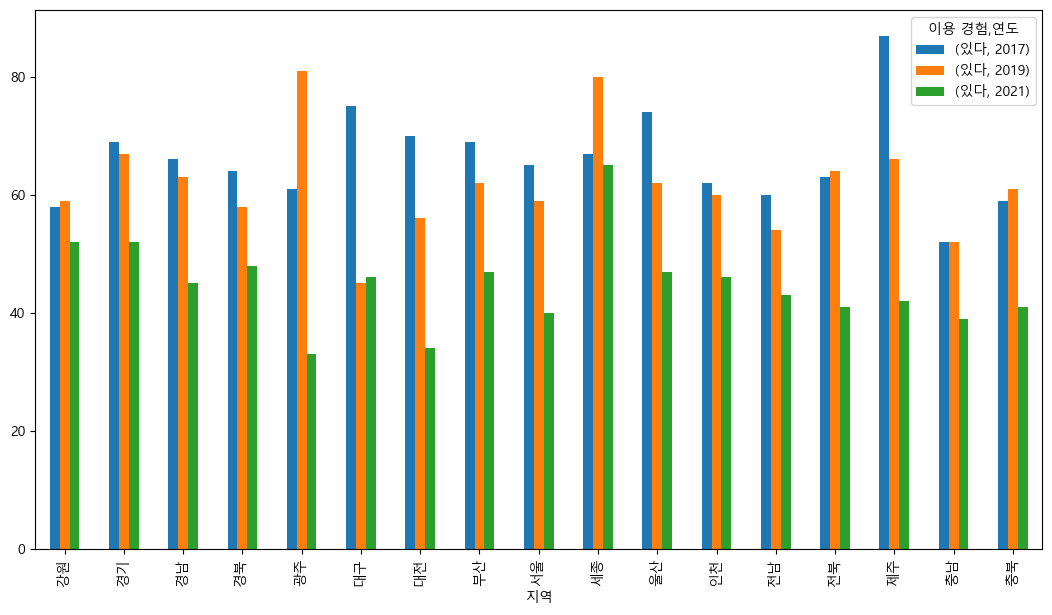

In [47]:
# 지역별 도서관 이용률 바 그래프  : plot.bar()
area_lib_plot.plot.bar(figsize=(13,7))

-----------------------------------------------------

### 월 평균 이용 빈도, 연 평균 이용 빈도

In [48]:
area_stu['연 평균 이용빈도'].unique()

array([0.0, 2.0, 1.0, 8.0, 4.0, 20.0, 5.0, 137.0, '없음', 92.0, 60.0, 10.0,
       7.0, 50.0, 6.0, 3.0, 100.0, 200.0, 140.0, 14.0, 300.0, 24.0, 48.0,
       13.0, 30.0, 15.0, 11.0, 90.0, 80.0, 122.0, 23.0, 55.0, 18.0, 12.0,
       9.0], dtype=object)

In [49]:
# 기술통계를 위해 문자 '없음' -> 0으로 변경
area_stu['연 평균 이용빈도'].replace({'없음':0},inplace=True)

### - 전국 학생의 월 평균 이용빈도, 연 평균 이용빈도

In [50]:
# 2017년은 월 평균 이용빈도, 연평균 이용빈도 설문X
# 2019년, 2021년의 기술통계값, 소숫점 첫째자리까지
area_stu.loc[[2019],:].describe().round(1)
area_stu.loc[[2021],:].describe().round(1)

,월 평균 이용빈도,연 평균 이용빈도
count,3126.0,3126.0
mean,1.8,1.5
std,3.8,10.9
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,2.0,0.0
max,31.0,300.0


,월 평균 이용빈도,연 평균 이용빈도
count,3320.0,3320.0
mean,1.1,0.6
std,2.8,4.4
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1.0,0.0
max,27.0,200.0


- 2019년, 전체 학생의 월 평균 도서관 이용빈도는 약 1.8회, 연 평균 도서관 이용빈도는 약 1.5회

- 2021년, 전체 학생의 월 평균 도서관 이용빈도는 약 1.1회, 연 평균 도서관 이용빈도는 약 0.6회

    -->2019년 대비 2021년 전체 학생의 학교 밖 도서관 이용 빈도는 감소하였다.


- 2019년, 월 평균 도서관 이용빈도가 가장 높은 학생은 월 31회, 연 평균 도서관 이용빈도가 가장 높은 학생은 연 300회 학교 밖 도서관을 이용했다.

- 2021년, 월 평균 도서관 이용빈도가 가장 높은 학생은 월 27회, 연 평균 도서관 이용빈도가 가장 높은 학생은 연 200회 학교 밖 도서관을 이용했다.

### - 지역별 전체 학생의 월 평균 이용빈도, 연 평균 이용빈도

In [51]:
# 2017년은 월 평균 이용빈도, 연 평균 이용빈도 설문X
# 2019,2021년도 지역별 전체 학생들의 월 평균, 연 평균 이용
list = area_stu.index.unique()
area_freq = pd.DataFrame(columns=[[],[]])

for yr_area in list:
    if yr_area[0] != 2017 :
        freq_temp = area_stu.loc[yr_area,:].mean().round(1)
        area_freq[yr_area[1],yr_area[0]] = freq_temp


In [52]:
# 열 인덱스 기준 정렬
area_freq = area_freq.sort_index(axis=1)

In [53]:
# 다중 인덱스 이름 설정
area_freq.columns.names=['지역','연도']
area_freq

지역          강원        경기        경남        경북        광주        대구        대전  \
연도        2019 2021 2019 2021 2019 2021 2019 2021 2019 2021 2019 2021 2019   
월 평균 이용빈도  1.5  1.0  2.2  1.2  1.6  1.3  1.7  1.7  3.1  1.3  1.2  1.0  2.3   
연 평균 이용빈도  1.8  0.7  2.6  0.8  0.8  0.8  0.5  0.6  0.7  0.1  0.4  0.4  0.4   

지역               부산        서울        세종        울산        인천        전남       \
연도        2021 2019 2021 2019 2021 2019 2021 2019 2021 2019 2021 2019 2021   
월 평균 이용빈도  0.7  1.8  1.0  1.6  1.2  2.2  2.4  1.4  1.4  1.5  1.2  1.7  1.2   
연 평균 이용빈도  0.3  0.7  0.7  1.7  0.3  0.7  0.4  0.9  0.7  1.4  0.3  1.2  0.2   

지역          전북        제주        충남        충북       
연도        2019 2021 2019 2021 2019 2021 2019 2021  
월 평균 이용빈도  1.5  0.7  1.4  0.6  1.6  0.7  2.1  1.2  
연 평균 이용빈도  1.2  0.4  1.2  0.6  1.3  0.4  1.6  1.6

### -한번이라도 학교 밖 도서관을 이용해 본 전국 학생들의 월 평균 이용빈도, 일 평균 이용빈도

In [54]:
# 필요 컬럼값 추출
lib_freq = area_stu.loc[:,['월 평균 이용빈도','연 평균 이용빈도']]

In [55]:
# 결측치 처리
lib_freq.replace({0:np.nan},inplace=True)
lib_freq.dropna(how='all',inplace=True)

In [56]:
# 평균값 : 월 평균 이용빈도
lib_freq['월 평균 이용빈도'].dropna().mean()

4.002572898799314

In [57]:
# 평균값 : 일 평균 이용빈도
lib_freq['연 평균 이용빈도'].dropna().mean()

7.341517857142857

- 월 평균 이용빈도 : 약 4회 
- 연 평균 이용빈도 : 약 7.3회

### - 지역별 평균

area_freq_total = pd.DataFrame(columns=[[],[]])

In [58]:
# 2017년은 월 평균 이용빈도, 연 평균 이용빈도 설문X
# 2019,2021년도 지역별 학생들의 월 평균, 연 평균 이용빈도

list = area_stu.index.unique()
area_freq_total = pd.DataFrame(columns=[[],[]])

for yr_area in list:
    if yr_area[0] != 2017 :
        lib_freq_m =lib_freq.loc[yr_area]['월 평균 이용빈도'].dropna().mean()
        lib_freq_y =lib_freq.loc[yr_area]['연 평균 이용빈도'].dropna().mean()
        area_freq_total[yr_area] = lib_freq_m,lib_freq_y

In [59]:
# 컬럼, 인덱스명 설정
area_freq_total.columns.names = ['연도','지역']
area_freq_total.index = ['월 평균 이용빈도','연 평균 이용빈도']
# 소숫점 첫째자리까지
area_freq_total = area_freq_total.round(1)

In [60]:
# 다중인덱스 레벨 변경, 컬럼명 기준 정렬
area_freq_total = area_freq_total.swaplevel(i=-2, j=-1, axis=1).sort_index(axis=1)
area_freq_total

지역          강원         경기        경남        경북        광주        대구        대전  \
연도        2019 2021  2019 2021 2019 2021 2019 2021 2019 2021 2019 2021 2019   
월 평균 이용빈도  4.3  3.3   4.8  3.4  3.6  4.1  3.9  4.8  4.7  5.2  3.9  3.3  6.0   
연 평균 이용빈도  8.6  3.8  17.7  4.9  4.6  5.8  5.2  6.6  5.3  1.8  3.5  3.3  3.0   

지역               부산         서울        세종        울산        인천         전남       \
연도        2021 2019 2021  2019 2021 2019 2021 2019 2021 2019 2021  2019 2021   
월 평균 이용빈도  3.2  4.3  3.4   4.0  4.1  3.9  4.3  3.3  4.2  3.8  3.5   4.2  3.7   
연 평균 이용빈도  3.1  5.1  4.3  10.6  3.4  3.8  4.5  5.5  5.0  7.9  3.6  10.7  2.4   

지역          전북        제주         충남         충북        
연도        2019 2021 2019 2021  2019 2021  2019  2021  
월 평균 이용빈도  3.8  2.7  3.3  2.1   4.1  3.0   4.6   4.3  
연 평균 이용빈도  5.8  3.0  5.9  4.1  14.5  2.8  10.4  17.5

In [61]:
# 월 평균 이용빈도 추출
area_freq_m_plot = area_freq_total.iloc[0]

In [62]:
# 행인덱스 레벨 해제
area_freq_m_plot = pd.DataFrame(area_freq_m_plot).unstack()

area_freq_m_plot.columns.names = ['월 이용빈도','연도']

<AxesSubplot:xlabel='지역'>

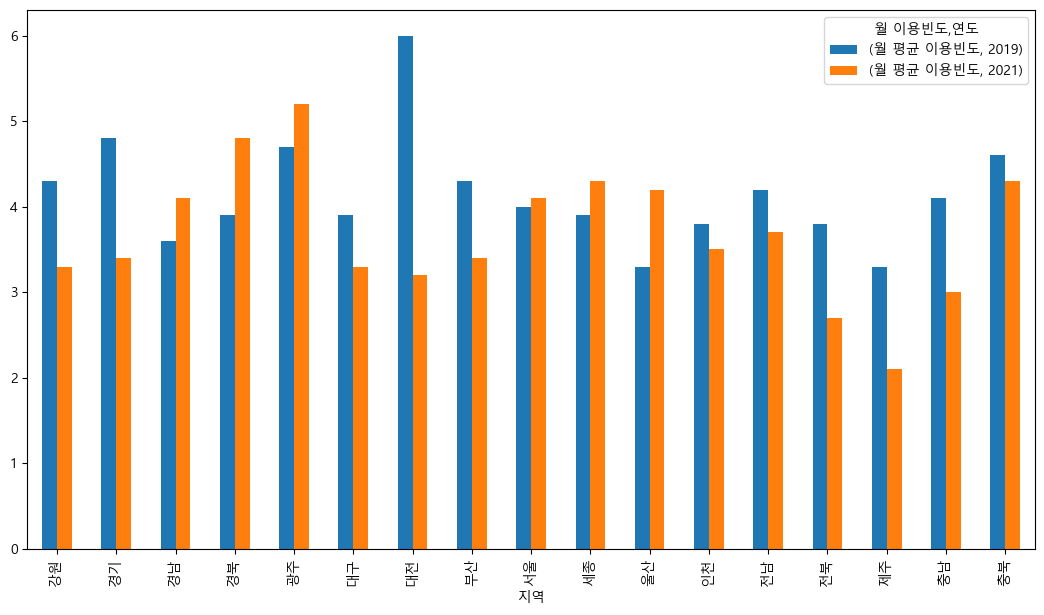

In [63]:
# 지역별 월 평균 이용빈도 바 그래프  : plot.bar()
area_freq_m_plot.plot.bar(figsize=(13,7))

In [64]:
# 연 평균 이용빈도 추출
area_freq_y_plot = area_freq_total.iloc[1]

In [65]:
# 행인덱스 레벨 해제
area_freq_y_plot = pd.DataFrame(area_freq_y_plot).unstack()

area_freq_y_plot.columns.names = ['연 이용빈도','연도']

<AxesSubplot:xlabel='지역'>

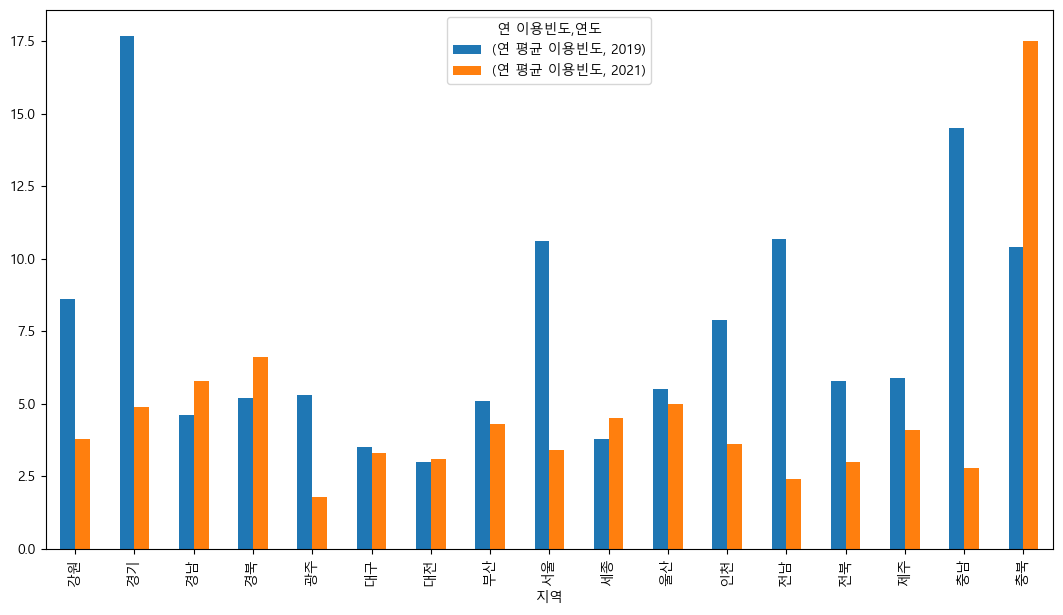

In [66]:
# 지역별 연 평균 이용빈도 그래프  : plot.bar()
area_freq_y_plot.plot.bar(figsize=(13,7))

### - 주 이용 도서관 종류

In [67]:
main_lib = total_stu.loc[:,['연도', '주이용 도서관 종류1', '주이용 도서관 종류2']]

In [68]:
main_lib

,연도,주이용 도서관 종류1,주이용 도서관 종류2
0,2017,0,0
1,2017,작은도서관,공공도서관
2,2017,어린이도서관,0
3,2017,작은도서관,어린이도서관
4,2017,기타,작은도서관
...,...,...,...
9770,2021,0,0
9771,2021,0,0
9772,2021,0,0
9773,2021,0,0


In [69]:
# 연도 기준 groupby()
main_lib_gr = main_lib.groupby('연도')

In [70]:
# 함수 정의 : 주이용 도서관 1순위에 가중치 2를 부여, 합산한 값 구하기.
def func_main_lib (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    gr.dropna(how='any',inplace=True)
    return gr['주이용 도서관 종류1'].value_counts()*2 + gr['주이용 도서관 종류2'].value_counts()

In [71]:
# 그룹화에 함수 적용
lib_rank = main_lib_gr.apply(func_main_lib)
lib_rank

,공공도서관,기타,어린이도서관,작은도서관
연도,,,,
2017,2698,182,541,1244
2019,2466,138,424,1187
2021,1919,93,302,1004


In [72]:
# 백분율로 확인하기
lib_rank_col = lib_rank.columns
lib_rank = lib_rank.div(lib_rank[lib_rank_col].sum(axis = 1),axis = 0).round(3)*100
lib_rank

,공공도서관,기타,어린이도서관,작은도서관
연도,,,,
2017,57.8,3.9,11.6,26.7
2019,58.5,3.3,10.1,28.2
2021,57.8,2.8,9.1,30.3


- 3개년 모두 **공동도서관 > 작은도서관 > 어린이도서관 > 기타** 순으로 주이용
- **작은 도서관 이용 비율은 꾸준히 증가**하고 있다

## -학교 밖 도서관 이용 이유, 비이용 이유

In [73]:
# 필요한 컬럼값 추출
reason_lib = total_stu.loc[:,['연도', '이용 이유', '비이용 이유']]

In [74]:
reason_lib

,연도,이용 이유,비이용 이유
0,2017,0,기타
1,2017,독서 및 도서 대출,0
2,2017,행사 참여,0
3,2017,숙제에 필요한 자료조사,0
4,2017,독서 및 도서 대출,0
...,...,...,...
9770,2021,0,책을 잘 읽지 않는다
9771,2021,0,책을 잘 읽지 않는다
9772,2021,0,책을 잘 읽지 않는다
9773,2021,0,이용 절차가 까다롭다


In [75]:
# 연도 기준 groupby()
reason_lib_gr = reason_lib.groupby('연도')

In [76]:
# 이용 이유 데이터값의 빈도를 구하는 함수 정의
def func_reason (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    return pd.DataFrame(gr['이용 이유'].value_counts())

In [77]:
# 그룹화 함수 적용
reason_rank = reason_lib_gr.apply(func_reason)

In [78]:
# 다중인덱스 제거
reason_rank = reason_rank.unstack(level=1)
reason_rank

이용 이유                                                      
        기타 독서 및 도서 대출 비디오, 영화 감상 숙제에 필요한 자료조사 시험 공부 인터넷 이용 행사 참여
연도                                                              
2017    72       1175         10          221   583     24    20
2019    67       1018         14          228   497     20    32
2021    63       1008         28          112   225     14    15

In [79]:
# 백분율로 확인하기
reason_rank_col = reason_rank.columns
reason_rank = reason_rank.div(reason_rank[reason_rank_col].sum(axis = 1),axis = 0).round(3)*100
reason_rank

이용 이유                                                      
        기타 독서 및 도서 대출 비디오, 영화 감상 숙제에 필요한 자료조사 시험 공부 인터넷 이용 행사 참여
연도                                                              
2017   3.4       55.8        0.5         10.5  27.7    1.1   1.0
2019   3.6       54.3        0.7         12.2  26.5    1.1   1.7
2021   4.3       68.8        1.9          7.6  15.4    1.0   1.0

- **독서 및 도서대출 > 시험공부 > 숙제에 필요한 자료조사**
- 2019년 대비 2021년의 독서 및 도서 대출의 비율이 약 14.5 퍼센트 포인트 증가

In [80]:
# 비이용 이유 데이터값의 빈도를 구하는 함수 정의
def func_reason_not (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    return pd.DataFrame(gr['비이용 이유'].value_counts())

In [81]:
# 그룹화 함수 적용
reason_not_rank = reason_lib_gr.apply(func_reason_not)

In [82]:
# 다중인덱스 제거
reason_not_rank = reason_not_rank.unstack(level=1)

In [83]:
reason_not_rank.replace({np.nan:0},inplace=True)
reason_not_rank

비이용 이유                                                                    \
         기타 독서 상담이나 안내자가 안 계신다   무응답 앉을 자리가 없다    없음 원하는 책이 없다 유익한 프로그램이 부족하다   
연도                                                                              
2017  289.0                0.0  23.0       9.0   0.0      34.0            6.0   
2019   81.0                2.0  13.0       0.0  24.0       0.0            3.0   
2021    0.0                2.0   0.0       0.0   0.0     162.0            2.0   

                                                                    \
     이용 절차가 까다롭다 읽고 싶은 책은 사서 읽는다 읽을 만한 책이 없다 주로 학교도서관을 이용한다 집에서 멀다   
연도                                                                   
2017        16.0             0.0        81.0          101.0  380.0   
2019        31.0            90.0         0.0          159.0  399.0   
2021        28.0           179.0        45.0          126.0  404.0   

                                                              
     책을 잘 읽지 않는다 책이 낡고, 시설이 쾌적하지 않다 학업 등의 이유로 바빠서 이용할 시간이 없다  
연도                                                            
2017         0.0               18.0                    195.0  
2019         0.0              107.0                    284.0  
2021       512.0               10.0                    350.0

In [84]:
# 백분율로 확인하기
reason_not_rank_col = reason_not_rank.columns
reason_not_rank = reason_not_rank.div(reason_not_rank[reason_not_rank_col].sum(axis = 1),axis = 0).round(3)*100
reason_not_rank

비이용 이유                                                                  \
         기타 독서 상담이나 안내자가 안 계신다  무응답 앉을 자리가 없다   없음 원하는 책이 없다 유익한 프로그램이 부족하다   
연도                                                                            
2017   25.1                0.0  2.0       0.8  0.0       3.0            0.5   
2019    6.8                0.2  1.1       0.0  2.0       0.0            0.3   
2021    0.0                0.1  0.0       0.0  0.0       8.9            0.1   

                                                                    \
     이용 절차가 까다롭다 읽고 싶은 책은 사서 읽는다 읽을 만한 책이 없다 주로 학교도서관을 이용한다 집에서 멀다   
연도                                                                   
2017         1.4             0.0         7.0            8.8   33.0   
2019         2.6             7.5         0.0           13.3   33.4   
2021         1.5             9.8         2.5            6.9   22.2   

                                                              
     책을 잘 읽지 않는다 책이 낡고, 시설이 쾌적하지 않다 학업 등의 이유로 바빠서 이용할 시간이 없다  
연도                                                            
2017         0.0                1.6                     16.9  
2019         0.0                9.0                     23.8  
2021        28.1                0.5                     19.2

- 2017년, 2019년 **집에서 멀다**가 약 33%로 가장 높다.
- 201년에는 책을 잘 읽지 않는다는 이유가 1위를 차지했지만, **집에서 멀다**는 이유가 2위로 여전히 높다.

## -도서 선택시 이용 정보, 도서 입수경로

### 도서 선택시 이용 정보

In [85]:
# 필요한 컬럼값 추출
book_stu = total_stu.loc[:,['연도','도서 선택시 이용정보1','도서 선택시 이용정보2', '도서 입수경로1', '도서 입수경로2']]

In [86]:
stu_year = book_stu.groupby('연도')

In [87]:
# 함수 정의 : 도서 선택 시 이용하는 정보 1순위에 가중치 2를 부여, 합산한 값 구하기.
def func_book_info (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    gr.dropna(how='any',inplace=True)
    return gr['도서 선택시 이용정보1'].value_counts()*2 + gr['도서 선택시 이용정보2'].value_counts()

In [88]:
# 그룹화에 함수 적용
book_info_rank = stu_year.apply(func_book_info)
book_info_rank

,SNS 책 소개,"가족, 선생님, 친구 추천",각종 기관의 추천도서,기타,"드라마, 영화의 원작",베스트셀러,"서점, 도서관 등에서 책을 직접 보고","신문이나 잡지의 책 소개, 광고","유명인, 전문가 추천","유튜브, 책방송 팟캐스트의 책 소개","인터넷의 책 소개, 광고","텔레비전이나 라디오의 책 소개, 광고"
연도,,,,,,,,,,,,
2017,462,1257,404,282,553,750,2615,191,218,16,583,220
2019,698,1175,390,257,579,820,2538,168,204,364,626,269
2021,651,1343,452,321,577,965,2451,180,248,365,759,211


In [89]:
# 백분율로 확인하기
book_info_rank_col = book_info_rank.columns
book_info_rank = book_info_rank.div(book_info_rank[book_info_rank_col].sum(axis = 1),axis = 0).round(3)*100
book_info_rank

,SNS 책 소개,"가족, 선생님, 친구 추천",각종 기관의 추천도서,기타,"드라마, 영화의 원작",베스트셀러,"서점, 도서관 등에서 책을 직접 보고","신문이나 잡지의 책 소개, 광고","유명인, 전문가 추천","유튜브, 책방송 팟캐스트의 책 소개","인터넷의 책 소개, 광고","텔레비전이나 라디오의 책 소개, 광고"
연도,,,,,,,,,,,,
2017,6.1,16.6,5.4,3.7,7.3,9.9,34.6,2.5,2.9,0.2,7.7,2.9
2019,8.6,14.5,4.8,3.2,7.2,10.1,31.4,2.1,2.5,4.5,7.7,3.3
2021,7.6,15.8,5.3,3.8,6.8,11.3,28.8,2.1,2.9,4.3,8.9,2.5


- 3년 모두 **서점, 도서관 등에서 책을 직접 보고** 결정하는 비율이 가장 높다.

### 도서 입수 경로

In [90]:
# 함수 정의 : 주이용 도서관 1순위에 가중치 2를 부여, 합산한 값 구하기.
def func_book_get (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    gr.dropna(how='any',inplace=True)
    return gr['도서 입수경로1'].value_counts()*2 + gr['도서 입수경로2'].value_counts()

In [91]:
# 그룹화에 함수 적용
book_get_rank = stu_year.apply(func_book_get)
book_get_rank = pd.DataFrame(book_get_rank)

In [92]:
book_get_rank = book_get_rank.unstack(level=1)
book_get_rank.replace({np.nan:0},inplace=True)

In [93]:
book_get_rank

0                                                        \
     구입하지 않고 서점에서 독서     기타 도서 대여점에서 대여 부모님께서 구입 선물받은 책 주위 사람에게 대여   직접 구입   
연도                                                                           
2017           192.0  135.0       215.0    812.0    0.0      442.0  1920.0   
2019           175.0   99.0       185.0    805.0    0.0      376.0  2209.0   
2021             0.0  206.0         0.0   1196.0  191.0      395.0  2672.0   

                                    
     집에 있는 책 학교 도서관 대여 학교 밖 도서관 대여  
연도                                  
2017  1184.0    1766.0       885.0  
2019  1289.0    1944.0      1006.0  
2021  1528.0    1354.0       981.0

In [94]:
# 백분율로 확인하기
book_get_rank_col = book_get_rank.columns
book_get_rank = book_get_rank.div(book_get_rank[book_get_rank_col].sum(axis = 1),axis = 0).round(3)*100
book_get_rank

0                                                    \
     구입하지 않고 서점에서 독서   기타 도서 대여점에서 대여 부모님께서 구입 선물받은 책 주위 사람에게 대여 직접 구입   
연도                                                                       
2017             2.5  1.8         2.8     10.8    0.0        5.9  25.4   
2019             2.2  1.2         2.3     10.0    0.0        4.6  27.3   
2021             0.0  2.4         0.0     14.0    2.2        4.6  31.4   

                                    
     집에 있는 책 학교 도서관 대여 학교 밖 도서관 대여  
연도                                  
2017    15.7      23.4        11.7  
2019    15.9      24.0        12.4  
2021    17.9      15.9        11.5

------------------------------------

------------------------------------

------------------------------------

# ②성인들의 도서관 이용 분석

### 지역별 도서관 이용률

In [95]:
total_adult.columns

Index(['지역', '연령', '성별', '독서 빈도', '독서장애요인1', '독서장애요인2', '도서 선택시 이용정보1',
       '도서 선택시 이용정보2', '도서 입수경로1', '도서 입수경로2', '종이책 선호분야1', '종이책 선호분야2',
       '전자책 선호분야1', '전자책 선호분야2', '도서관 이용경험', '주이용 도서관 종류1', '월 평균 이용빈도',
       '연 평균 이용빈도', '이용 목적', '비이용 이유', '최종학력', '연도', '독서 선호도', '주이용 도서관 종류2',
       '평일 평균 독서시간(분)', '주말 평균 독서시간(분)', '종이_평일 평균 독서시간(분)',
       '종이_주말 평균 독서시간(분)', '전자_평일 평균 독서시간(분)', '전자_주말 평균 독서시간(분)',
       '오디오_평일 평균 독서시간(분)', '오디오_주말 평균 독서시간(분)'],
      dtype='object')

In [96]:
# 필요한 컬럼 출력
area_adult = total_adult.loc[:,['연도','지역','도서관 이용경험','월 평균 이용빈도', '연 평균 이용빈도', '주이용 도서관 종류1', 
                            '주이용 도서관 종류2', '이용 목적', '비이용 이유']]

In [97]:
# 연도와 지역 다중인덱스 설정 : set_index()
area_adult = area_adult.set_index(['연도','지역'])
area_adult

도서관 이용경험  월 평균 이용빈도  연 평균 이용빈도 주이용 도서관 종류1 주이용 도서관 종류2       이용 목적  \
연도   지역                                                                      
2017 서울       있다          1          0       공공도서관         0.0  독서 및 도서 대출   
     서울       없다          0          0           0         0.0           0   
     서울       없다          0          0           0         0.0           0   
     서울       없다          0          0           0         0.0           0   
     서울       있다          1          0       공공도서관         0.0      공부, 학습   
...          ...        ...        ...         ...         ...         ...   
2021 경기       있다          0          1       대학도서관       공공도서관      공부, 학습   
     경기       있다          2          0       대학도서관       공공도서관      공부, 학습   
     경기       없다          0          0           0         0.0           0   
     경기       없다          0          0           0         0.0           0   
     경기       없다          0          0           0         0.0           0   

                    비이용 이유  
연도   지역                     
2017 서울                  0  
     서울        읽을 만한 책이 없다  
     서울   이용할 필요성을 느끼지 못한다  
     서울  읽고 싶은 책은 구입해서 읽는다  
     서울                  0  
...                    ...  
2021 경기                  0  
     경기                  0  
     경기     일이 바빠 갈 시간이 없다  
     경기     일이 바빠 갈 시간이 없다  
     경기          책을 읽지 않는다  

[18000 rows x 7 columns]

In [98]:
# 무응답 값 결측치 처리
area_adult['도서관 이용경험'].replace({9:np.nan},inplace=True)

In [99]:
# 도서관 이용률

list = area_adult.index.unique()
area_lib = pd.DataFrame(columns=[[],[]])

for yr_area in list:
    lib_temp = area_adult.loc[yr_area]['도서관 이용경험'].value_counts(normalize=True).round(2)*100
    area_lib[yr_area[1],yr_area[0]] = lib_temp


In [100]:
# 열 인덱스 기준 정렬
area_lib = area_lib.sort_index(axis=1)

In [101]:
# 다중 인덱스 이름 설정
area_lib.columns.names=['지역','연도']
area_lib

지역    강원                경기                경남                경북              \
연도  2017  2019  2021  2017  2019  2021  2017  2019  2021  2017  2019  2021   
없다  71.0  74.0  91.0  73.0  73.0  76.0  90.0  86.0  89.0  74.0  80.0  82.0   
있다  29.0  26.0   9.0  27.0  27.0  24.0  10.0  14.0  11.0  26.0  20.0  18.0   

지역    광주                대구                대전                부산              \
연도  2017  2019  2021  2017  2019  2021  2017  2019  2021  2017  2019  2021   
없다  86.0  81.0  73.0  76.0  73.0  75.0  86.0  88.0  89.0  81.0  80.0  87.0   
있다  14.0  19.0  27.0  24.0  27.0  25.0  14.0  12.0  11.0  19.0  20.0  13.0   

지역    서울  ...          세종                울산                인천              \
연도  2017  ...  2021  2017  2019  2021  2017  2019  2021  2017  2019  2021   
없다  73.0  ...  78.0  76.0  73.0  82.0  71.0  80.0  87.0  76.0  70.0  85.0   
있다  27.0  ...  22.0  24.0  27.0  18.0  29.0  20.0  13.0  24.0  30.0  15.0   

지역    전남                전북                제주                충남              \
연도  2017  2019  2021  2017  2019  2021  2017  2019  2021  2017  2019  2021   
없다  91.0  90.0  95.0  89.0  94.0  92.0  69.0  72.0  79.0  86.0  87.0  96.0   
있다   9.0  10.0   5.0  11.0   6.0   8.0  31.0  28.0  21.0  14.0  13.0   4.0   

지역    충북              
연도  2017  2019  2021  
없다  90.0  88.0  95.0  
있다  10.0  12.0   5.0  

[2 rows x 51 columns]

----------------------------------------------

### 지역별 도서관 이용률 시각화

In [102]:
# 도서관 이용률 추출
area_lib_plot = area_lib.iloc[1]

In [103]:
# 행인덱스 레벨 해제
area_lib_plot = pd.DataFrame(area_lib_plot).unstack()

# 컬럼 이름 설정
area_lib_plot.columns.names = ['이용 경험','연도']

<AxesSubplot:xlabel='지역'>

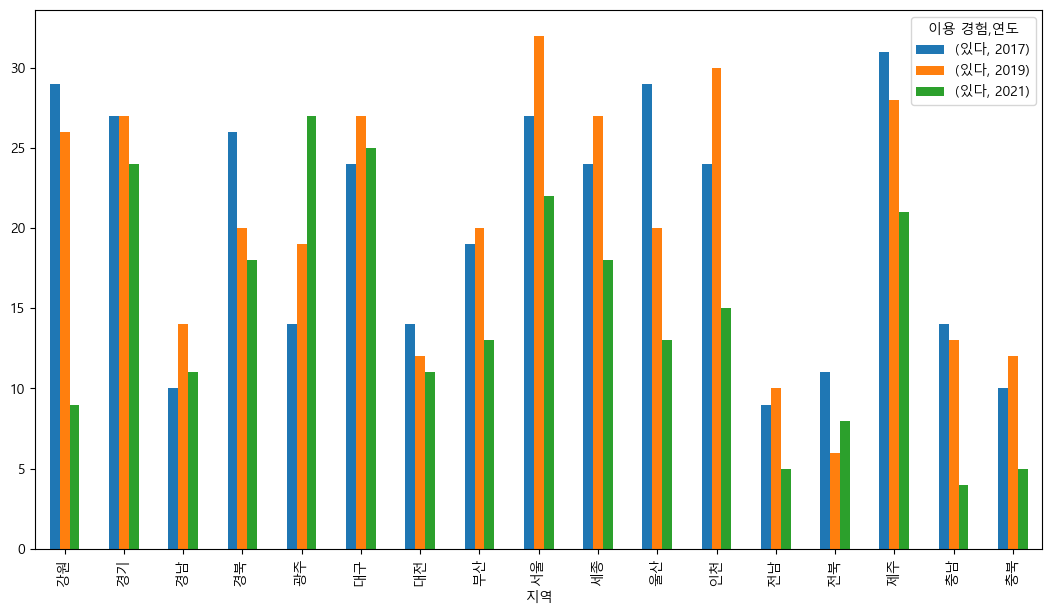

In [104]:
# 지역별 도서관 이용률 바 그래프  : plot.bar()
area_lib_plot.plot.bar(figsize=(13,7))

-----------------------------------------------------

### 월 평균 이용 빈도, 연 평균 이용 빈도

### - 전국 성인의 월 평균 이용빈도, 연 평균 이용빈도

In [105]:
# 2017년은 월 평균 이용빈도, 연평균 이용빈도 설문X
# 2019년, 2021년의 기술통계값, 소숫점 첫째자리까지
area_adult.loc[[2019],:].describe().round(1)
area_adult.loc[[2021],:].describe().round(1)

,월 평균 이용빈도,연 평균 이용빈도
count,6000.0,6000.0
mean,0.5,0.4
std,2.1,1.8
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,30.0,60.0


,월 평균 이용빈도,연 평균 이용빈도
count,6000.0,6000.0
mean,0.5,0.3
std,2.0,1.8
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,30.0,60.0


- 2019년, 전체 성인의 월 평균 도서관 이용빈도는 약 0.5회, 연 평균 도서관 이용빈도는 약 0.4회

- 2021년, 전체 성인의 월 평균 도서관 이용빈도는 약 0.5회, 연 평균 도서관 이용빈도는 약 0.3회


- 2019년, 월 평균 도서관 이용빈도가 가장 높은 성인은 월 30회, 연 평균 도서관 이용빈도가 가장 높은 성인은 연 60회 도서관을 이용했다.

- 2021년, 월 평균 도서관 이용빈도가 가장 높은 성인은 월 30회, 연 평균 도서관 이용빈도가 가장 높은 성인은 연 60회 학교 밖 도서관을 이용했다.

### - 지역별 성인의 월 평균 이용빈도, 연 평균 이용빈도

In [106]:
area_adult

도서관 이용경험  월 평균 이용빈도  연 평균 이용빈도 주이용 도서관 종류1 주이용 도서관 종류2       이용 목적  \
연도   지역                                                                      
2017 서울       있다          1          0       공공도서관         0.0  독서 및 도서 대출   
     서울       없다          0          0           0         0.0           0   
     서울       없다          0          0           0         0.0           0   
     서울       없다          0          0           0         0.0           0   
     서울       있다          1          0       공공도서관         0.0      공부, 학습   
...          ...        ...        ...         ...         ...         ...   
2021 경기       있다          0          1       대학도서관       공공도서관      공부, 학습   
     경기       있다          2          0       대학도서관       공공도서관      공부, 학습   
     경기       없다          0          0           0         0.0           0   
     경기       없다          0          0           0         0.0           0   
     경기       없다          0          0           0         0.0           0   

                    비이용 이유  
연도   지역                     
2017 서울                  0  
     서울        읽을 만한 책이 없다  
     서울   이용할 필요성을 느끼지 못한다  
     서울  읽고 싶은 책은 구입해서 읽는다  
     서울                  0  
...                    ...  
2021 경기                  0  
     경기                  0  
     경기     일이 바빠 갈 시간이 없다  
     경기     일이 바빠 갈 시간이 없다  
     경기          책을 읽지 않는다  

[18000 rows x 7 columns]

In [107]:
# 2017년은 월 평균 이용빈도, 연 평균 이용빈도 설문X
# 2019,2021년도 지역별 전체 성인의 월 평균, 연 평균 이용
list = area_adult.index.unique()
area_freq = pd.DataFrame(columns=[[],[]])

for yr_area in list:
    if yr_area[0] != 2017 :
        freq_temp = area_adult.loc[yr_area,['월 평균 이용빈도','연 평균 이용빈도']].mean().round(1)
        area_freq[yr_area[1],yr_area[0]] = freq_temp


In [108]:
# 열 인덱스 기준 정렬
area_freq = area_freq.sort_index(axis=1)

In [109]:
# 다중 인덱스 이름 설정
area_freq.columns.names=['지역','연도']
area_freq

지역          강원        경기        경남        경북        광주        대구        대전  \
연도        2019 2021 2019 2021 2019 2021 2019 2021 2019 2021 2019 2021 2019   
월 평균 이용빈도  0.7  0.1  0.6  0.9  0.4  0.3  0.5  0.2  0.7  0.5  0.4  0.7  0.2   
연 평균 이용빈도  0.7  0.1  0.5  0.3  0.4  0.1  0.5  0.4  0.1  2.0  0.6  0.3  0.2   

지역               부산        서울        세종        울산        인천        전남       \
연도        2021 2019 2021 2019 2021 2019 2021 2019 2021 2019 2021 2019 2021   
월 평균 이용빈도  0.5  0.7  0.5  0.8  0.7  0.9  1.0  0.4  0.3  0.5  0.4  0.5  0.2   
연 평균 이용빈도  0.1  0.3  0.1  0.4  0.3  0.6  0.2  0.3  0.1  0.5  0.1  0.0  0.1   

지역          전북        제주        충남        충북       
연도        2019 2021 2019 2021 2019 2021 2019 2021  
월 평균 이용빈도  0.3  0.1  0.7  0.3  0.1  0.1  0.2  0.2  
연 평균 이용빈도  0.1  0.1  0.6  0.3  0.3  0.0  0.1  0.1

### -한번이라도 도서관을 이용해 본 전국 성인의 월 평균 이용빈도, 일 평균 이용빈도

In [110]:
# 필요 컬럼값 추출
lib_freq = area_adult.loc[:,['월 평균 이용빈도','연 평균 이용빈도']]

In [111]:
# 결측치 처리
lib_freq.replace({0:np.nan},inplace=True)
lib_freq.dropna(how='all',inplace=True)

In [112]:
# 평균값 : 월 평균 이용빈도
lib_freq['월 평균 이용빈도'].dropna().mean()

4.148313492063492

In [113]:
# 평균값 : 일 평균 이용빈도
lib_freq['연 평균 이용빈도'].dropna().mean()

4.674859550561798

- 월 평균 이용빈도 : 약 4.1회 
- 연 평균 이용빈도 : 약 4.7회

### - 지역별 평균

area_freq_total = pd.DataFrame(columns=[[],[]])

In [114]:
# 2017년은 월 평균 이용빈도, 연 평균 이용빈도 설문X
# 2019,2021년도 지역별 성인들의 월 평균, 연 평균 이용빈도

list = area_adult.index.unique()
area_freq_total = pd.DataFrame(columns=[[],[]])

for yr_area in list:
    if yr_area[0] != 2017 :
        lib_freq_m =lib_freq.loc[yr_area]['월 평균 이용빈도'].dropna().mean()
        lib_freq_y =lib_freq.loc[yr_area]['연 평균 이용빈도'].dropna().mean()
        area_freq_total[yr_area] = lib_freq_m,lib_freq_y

In [115]:
# 컬럼, 인덱스명 설정
area_freq_total.columns.names = ['연도','지역']
area_freq_total.index = ['월 평균 이용빈도','연 평균 이용빈도']
# 소숫점 첫째자리까지
area_freq_total = area_freq_total.round(1)

In [116]:
# 다중인덱스 레벨 변경, 컬럼명 기준 정렬
area_freq_total = area_freq_total.swaplevel(i=-2, j=-1, axis=1).sort_index(axis=1)
area_freq_total

지역          강원        경기        경남        경북        광주         대구        대전  \
연도        2019 2021 2019 2021 2019 2021 2019 2021 2019  2021 2019 2021 2019   
월 평균 이용빈도  5.6  2.8  3.9  5.3  4.7  4.1  4.6  3.1  4.1   3.4  2.9  4.8  3.5   
연 평균 이용빈도  5.0  3.4  4.4  4.5  6.3  4.8  5.9  4.3  3.5  14.7  4.6  3.2  2.7   

지역               부산        서울        세종        울산        인천        전남       \
연도        2021 2019 2021 2019 2021 2019 2021 2019 2021 2019 2021 2019 2021   
월 평균 이용빈도  6.9  6.3  4.7  4.3  4.3  8.7  8.9  3.9  2.6  3.5  3.2  5.8  5.9   
연 평균 이용빈도  4.1  3.9  3.7  3.4  4.4  3.7  3.5  3.8  3.2  3.4  3.4  7.0  4.3   

지역          전북        제주        충남        충북       
연도        2019 2021 2019 2021 2019 2021 2019 2021  
월 평균 이용빈도  5.8  1.9  4.3  2.5  4.2  4.1  3.2  6.4  
연 평균 이용빈도  6.5  3.7  5.0  3.9  2.8  3.0  2.5  3.2

In [117]:
# 월 평균 이용빈도 추출
area_freq_m_plot = area_freq_total.iloc[0]

In [118]:
# 행인덱스 레벨 해제
area_freq_m_plot = pd.DataFrame(area_freq_m_plot).unstack()

area_freq_m_plot.columns.names = ['월 이용빈도','연도']

<AxesSubplot:xlabel='지역'>

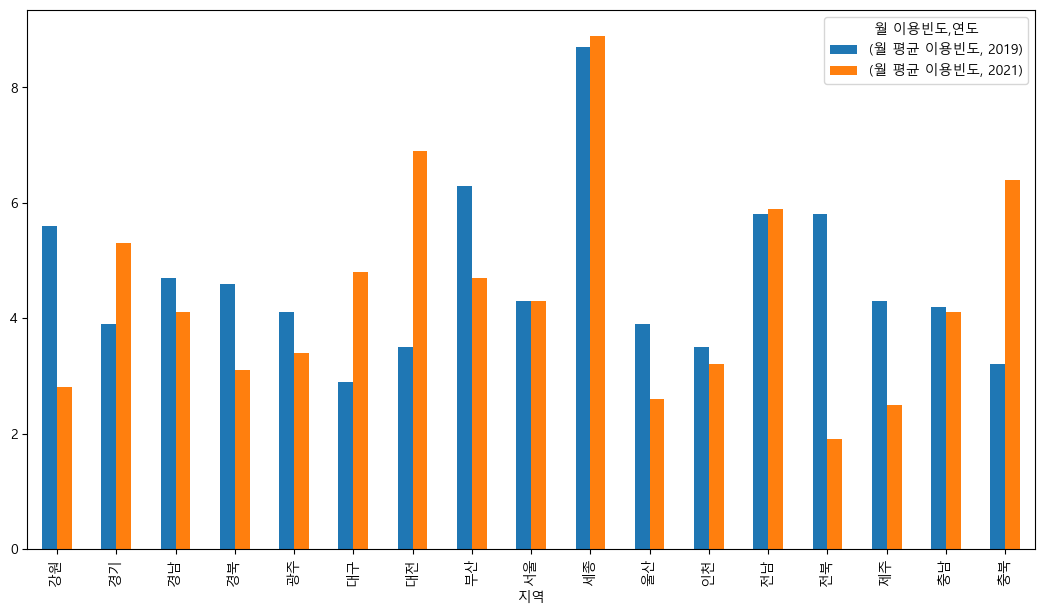

In [119]:
# 지역별 월 평균 이용빈도 바 그래프  : plot.bar()
area_freq_m_plot.plot.bar(figsize=(13,7))

- 2019년, 2021년 모두 **세종**이 압도적 1등

In [120]:
# 연 평균 이용빈도 추출
area_freq_y_plot = area_freq_total.iloc[1]

In [121]:
# 행인덱스 레벨 해제
area_freq_y_plot = pd.DataFrame(area_freq_y_plot).unstack()

area_freq_y_plot.columns.names = ['연 이용빈도','연도']

<AxesSubplot:xlabel='지역'>

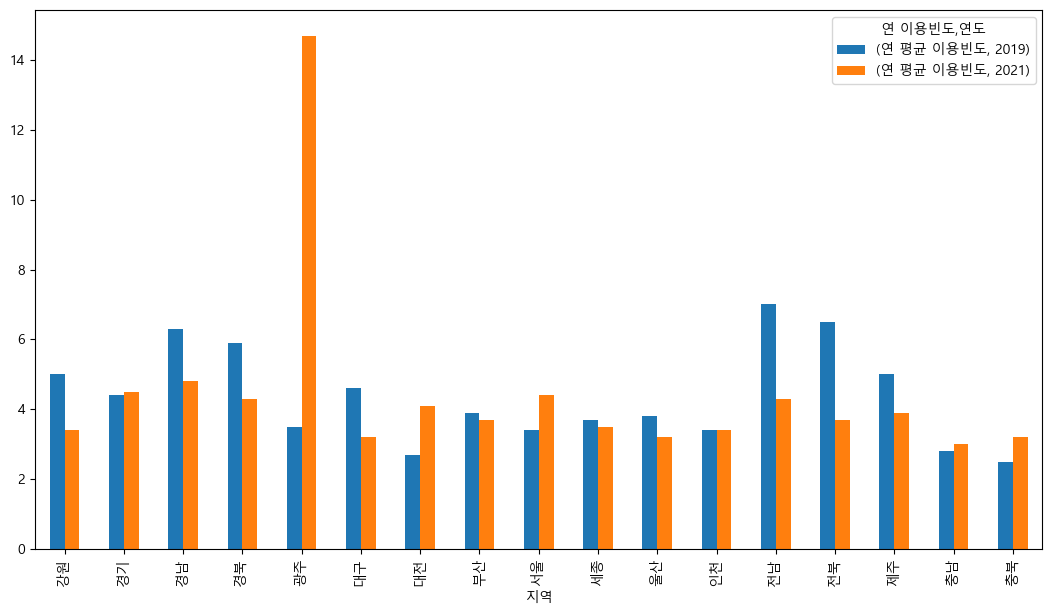

In [122]:
# 지역별 연 평균 이용빈도 그래프  : plot.bar()
area_freq_y_plot.plot.bar(figsize=(13,7))

### 오류 : 모든 행에 하나라도 결측치가 존재.. 결측치행을 제거하면 하나도 안남음.. 그만큼 독서량이 적다..

### - 주 이용 도서관 종류

In [123]:
main_lib = total_adult.loc[:,['연도', '주이용 도서관 종류1', '주이용 도서관 종류2']]

In [124]:
main_lib

,연도,주이용 도서관 종류1,주이용 도서관 종류2
0,2017,공공도서관,0.0
1,2017,0,0.0
2,2017,0,0.0
3,2017,0,0.0
4,2017,공공도서관,0.0
...,...,...,...
17995,2021,대학도서관,공공도서관
17996,2021,대학도서관,공공도서관
17997,2021,0,0.0
17998,2021,0,0.0


# !!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [125]:
# 연도 기준 groupby()
main_lib_gr = main_lib.groupby('연도')

In [126]:
# 함수 정의 : 주이용 도서관 1순위에 가중치 2를 부여, 합산한 값 구하기.
def func_main_lib (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    gr.dropna(how='all',inplace=True)
    return gr['주이용 도서관 종류1'].value_counts()*2 + gr['주이용 도서관 종류2'].value_counts()

In [127]:
# 그룹화에 함수 적용
lib_rank = main_lib_gr.apply(func_main_lib)
lib_rank

연도           
2017  공공도서관         NaN
      어린이 도서관       NaN
      전문도서관         NaN
2019  공공도서관         NaN
      대학도서관         NaN
      학교도서관         NaN
      직장도서관         NaN
      전문도서관         NaN
      기타            NaN
2021  공공도서관      1555.0
      기타            4.0
      대학도서관       328.0
      전문도서관       129.0
      직장도서관        35.0
      학교도서관       213.0
dtype: float64

In [128]:
# 백분율로 확인하기
lib_rank_col = lib_rank.columns
lib_rank = lib_rank.div(lib_rank[lib_rank_col].sum(axis = 1),axis = 0).round(3)*100
lib_rank

AttributeError: 'Series' object has no attribute 'columns'

- 3개년 모두 **공동도서관 > 작은도서관 > 어린이도서관 > 기타** 순으로 주이용
- **작은 도서관 이용 비율은 꾸준히 증가**하고 있다

## -도서관 이용 이유, 비이용 이유

In [129]:
# 필요한 컬럼값 추출
reason_lib = total_adult.loc[:,['연도', '이용 목적', '비이용 이유']]

In [130]:
reason_lib

,연도,이용 목적,비이용 이유
0,2017,독서 및 도서 대출,0
1,2017,0,읽을 만한 책이 없다
2,2017,0,이용할 필요성을 느끼지 못한다
3,2017,0,읽고 싶은 책은 구입해서 읽는다
4,2017,"공부, 학습",0
...,...,...,...
17995,2021,"공부, 학습",0
17996,2021,"공부, 학습",0
17997,2021,0,일이 바빠 갈 시간이 없다
17998,2021,0,일이 바빠 갈 시간이 없다


In [131]:
# 연도 기준 groupby()
reason_lib_gr = reason_lib.groupby('연도')

In [132]:
# 이용 이유 데이터값의 빈도를 구하는 함수 정의
def func_reason (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    return pd.DataFrame(gr['이용 목적'].value_counts())

In [133]:
# 그룹화 함수 적용
reason_rank = reason_lib_gr.apply(func_reason)

In [134]:
# 다중인덱스 제거
reason_rank = reason_rank.unstack(level=1)
reason_rank.replace({np.nan:0},inplace=True)
# 시리즈 형태를 데이터 프레임으로 변경
reason_rank =pd.DataFrame(reason_rank)

In [135]:
reason_rank

이용 목적                                            
     공부, 학습    기타 독서 및 도서 대출   자료조사 전자자료 이용 행사, 프로그램 참여
연도                                                     
2017  278.0  23.0      792.0   94.0     0.0        51.0
2019  320.0  14.0      762.0  146.0     0.0        29.0
2021  216.0   2.0      598.0   85.0    26.0         5.0

In [136]:
# 백분율로 확인하기
reason_rank_col = reason_rank.columns
reason_rank = reason_rank.div(reason_rank[reason_rank_col].sum(axis = 1),axis = 0).round(3)*100
reason_rank

이용 목적                                          
     공부, 학습   기타 독서 및 도서 대출  자료조사 전자자료 이용 행사, 프로그램 참여
연도                                                   
2017   22.5  1.9       64.0   7.6     0.0         4.1
2019   25.2  1.1       60.0  11.5     0.0         2.3
2021   23.2  0.2       64.2   9.1     2.8         0.5

- **독서 및 도서대출 > 공부,학습 >\ 자료조사**

In [137]:
# 비이용 이유 데이터값의 빈도를 구하는 함수 정의
def func_reason_not (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    return pd.DataFrame(gr['비이용 이유'].value_counts())

In [138]:
# 그룹화 함수 적용
reason_not_rank = reason_lib_gr.apply(func_reason_not)

In [139]:
# 다중인덱스 제거
reason_not_rank = reason_not_rank.unstack(level=1)
reason_not_rank.replace({np.nan:0},inplace=True)
reason_not_rank

비이용 이유                                                    \
     개관 시간이 짧다    기타 독서 상담, 안내를 해주는 사서가 없다 시설이 낡아서 쾌적하지 않다    없음   
연도                                                                 
2017      32.0  25.0                  26.0            36.0   0.0   
2019      37.0  39.0                   0.0            15.0  19.0   
2021      85.0  55.0                   0.0            24.0   0.0   

                                                                 \
     유익한 프로그램이 부족하다 이용 절차가 까다롭다 이용할 필요성을 느끼지 못한다 일이 바빠 갈 시간이 없다   
연도                                                                
2017           42.0        19.0           1742.0         2090.0   
2019           40.0        36.0              0.0         1873.0   
2021           35.0        38.0              0.0         1624.0   

                                                                        
     읽고 싶은 책은 구입해서 읽는다 읽을 만한 책이 없다 직장 또는 학교 도서관을 이용한다 집에서 멀다 책을 읽지 않는다  
연도                                                                      
2017             170.0       137.0               76.0  367.0       0.0  
2019             226.0       124.0               18.0  413.0    1889.0  
2021             193.0       137.0                0.0  553.0    2324.0

In [140]:
# 백분율로 확인하기
reason_not_rank_col = reason_not_rank.columns
reason_not_rank = reason_not_rank.div(reason_not_rank[reason_not_rank_col].sum(axis = 1),axis = 0).round(3)*100
reason_not_rank

비이용 이유                                                                 \
     개관 시간이 짧다   기타 독서 상담, 안내를 해주는 사서가 없다 시설이 낡아서 쾌적하지 않다   없음 유익한 프로그램이 부족하다   
연도                                                                              
2017       0.7  0.5                   0.5             0.8  0.0            0.9   
2019       0.8  0.8                   0.0             0.3  0.4            0.8   
2021       1.7  1.1                   0.0             0.5  0.0            0.7   

                                                                    \
     이용 절차가 까다롭다 이용할 필요성을 느끼지 못한다 일이 바빠 갈 시간이 없다 읽고 싶은 책은 구입해서 읽는다   
연도                                                                   
2017         0.4             36.6           43.9               3.6   
2019         0.8              0.0           39.6               4.8   
2021         0.7              0.0           32.0               3.8   

                                                      
     읽을 만한 책이 없다 직장 또는 학교 도서관을 이용한다 집에서 멀다 책을 읽지 않는다  
연도                                                    
2017         2.9                1.6    7.7       0.0  
2019         2.6                0.4    8.7      39.9  
2021         2.7                0.0   10.9      45.9

- 2019년, 2021년 **'책을 읽지 않는다'**가 1위

## -도서 선택시 이용 정보, 도서 입수경로

### 도서 선택시 이용 정보

In [141]:
# 필요한 컬럼값 추출
book_adult = total_adult.loc[:,['연도','도서 선택시 이용정보1','도서 선택시 이용정보2', '도서 입수경로1', '도서 입수경로2']]

In [142]:
adult_year = book_adult.groupby('연도')

In [143]:
# 함수 정의 : 도서 선택 시 이용하는 정보 1순위에 가중치 2를 부여, 합산한 값 구하기.
def func_book_info (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    gr.dropna(how='any',inplace=True)
    return gr['도서 선택시 이용정보1'].value_counts()*2 + gr['도서 선택시 이용정보2'].value_counts()

In [144]:
# 그룹화에 함수 적용
book_info_rank = adult_year.apply(func_book_info)
book_info_rank = pd.DataFrame(book_info_rank)

In [145]:
# 열 인덱스 레벨 제거
book_info_rank = book_info_rank.unstack(level=1)

In [146]:
book_info_rank.replace({np.nan:0},inplace=True)

In [147]:
# 백분율로 확인하기
book_info_rank_col = book_info_rank.columns
book_info_rank = book_info_rank.div(book_info_rank[book_info_rank_col].sum(axis = 1),axis = 0).round(3)*100
book_info_rank

0                                              \
     SNS 책 소개 가족, 친구 추천 각종 기관 추천도서   기타 드라마, 영화의 원작 베스트셀러   
연도                                                          
2017      9.1      12.5        0.0  0.4         8.4   5.0   
2019      3.2      13.3        3.9  0.2         0.9  10.1   
2021      2.6      12.0        5.9  0.0         1.1  14.5   

                                                                             \
     서점, 도서관 등에서 책을 직접 보고 신문이나 잡지의 책 소개, 광고 유명인, 전문가 추천 유튜브, 책방송 팟캐스트의 책 소개   
연도                                                                            
2017                 29.8              11.3         0.0                 0.3   
2019                 29.1               7.5         4.2                 1.7   
2021                 22.6               7.3         5.3                 3.4   

                                         
     인터넷의 책 소개, 광고 텔레비전이나 라디오의 책 소개, 광고  
연도                                       
2017          15.4                  7.8  
2019          17.2                  8.6  
2021          20.3                  5.1

- 3년 모두 **서점, 도서관 등에서 책을 직접 보고** 결정하는 비율이 가장 높다.

### 도서 입수 경로

In [148]:
# 함수 정의 : 주이용 도서관 1순위에 가중치 2를 부여, 합산한 값 구하기.
def func_book_get (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    gr.dropna(how='any',inplace=True)
    return gr['도서 입수경로1'].value_counts()*2 + gr['도서 입수경로2'].value_counts()

In [149]:
# 그룹화에 함수 적용
book_get_rank = adult_year.apply(func_book_get)
book_get_rank = pd.DataFrame(book_get_rank)

In [150]:
book_get_rank

,공공장소 비치,기타,도서관 대여,선물,주위 사람에게 대여,직장 비치,직접 구입,집에 있는 책
연도,,,,,,,,
2017,270,47,926,430,497,279,4108,1741
2019,234,24,910,315,459,224,3607,1625
2021,117,22,757,373,573,145,3889,1312


In [151]:
# 백분율로 확인하기
book_get_rank_col = book_get_rank.columns
book_get_rank = book_get_rank.div(book_get_rank[book_get_rank_col].sum(axis = 1),axis = 0).round(3)*100
book_get_rank

,공공장소 비치,기타,도서관 대여,선물,주위 사람에게 대여,직장 비치,직접 구입,집에 있는 책
연도,,,,,,,,
2017,3.3,0.6,11.2,5.2,6.0,3.4,49.5,21.0
2019,3.2,0.3,12.3,4.3,6.2,3.0,48.8,22.0
2021,1.6,0.3,10.5,5.2,8.0,2.0,54.1,18.3


직접 구입

# ③학생의 독서에 대한 인식 분석

In [177]:
# 연도별 그룹화
stu_gr = total_stu.groupby('연도')
stu_gr

In [178]:
# 연도별 독서시간 평균값 데이터프레임
read_avg_stu = stu_gr.mean().round(1).drop('월 평균 이용빈도',axis=1)

In [179]:
read_avg_stu

,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분)
연도,,,,,,,,
2017,40.0,55.1,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,58.5,47.7,17.6,20.1,6.0,4.6
2021,0.0,0.0,35.9,41.9,29.8,42.9,6.8,8.7


In [180]:
#2019,2021년 종류별 독서시간 -> 전체 독서시간
for i in range(1,3):
    read_avg_stu.iloc[i,0] = read_avg_stu.iloc[i,2] + read_avg_stu.iloc[i,4] + read_avg_stu.iloc[i,6]
    read_avg_stu.iloc[i,1] = read_avg_stu.iloc[i,3] + read_avg_stu.iloc[i,5] + read_avg_stu.iloc[i,6]
    
read_avg_stu

,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분)
연도,,,,,,,,
2017,40.0,55.1,0.0,0.0,0.0,0.0,0.0,0.0
2019,82.1,73.8,58.5,47.7,17.6,20.1,6.0,4.6
2021,72.5,91.6,35.9,41.9,29.8,42.9,6.8,8.7


In [181]:
# 종류별 평일/주말 평균 독서시간 -> 일 평균 독서시간 추출
read_avg_stu.insert(2,'일 평균 독서시간(분)',(read_avg_stu.iloc[:,0]*5 + read_avg_stu.iloc[:,1]*2)/7)
read_avg_stu.insert(5,'종이_일 평균 독서시간(분)',(read_avg_stu.iloc[:,3]*5 + read_avg_stu.iloc[:,4]*2)/7)
read_avg_stu.insert(8,'전자_일 평균 독서시간(분)',(read_avg_stu.iloc[:,6]*5 + read_avg_stu.iloc[:,7]*2)/7)
read_avg_stu.insert(11,'오디오_일 평균 독서시간(분)',(read_avg_stu.iloc[:,9]*5 + read_avg_stu.iloc[:,10]*2)/7)

read_avg_stu

,평일 평균 독서시간(분),주말 평균 독서시간(분),일 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),종이_일 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),전자_일 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분),오디오_일 평균 독서시간(분)
연도,,,,,,,,,,,,
2017,40.0,55.1,44.314286,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2019,82.1,73.8,79.728571,58.5,47.7,55.414286,17.6,20.1,18.314286,6.0,4.6,5.600000
2021,72.5,91.6,77.957143,35.9,41.9,37.614286,29.8,42.9,33.542857,6.8,8.7,7.342857


------------------------------------

### 연도별 독서시간 변화 시각화 : line.plot()

<AxesSubplot:title={'center':'학생들의 평균 독서시간'}, xlabel='연도'>

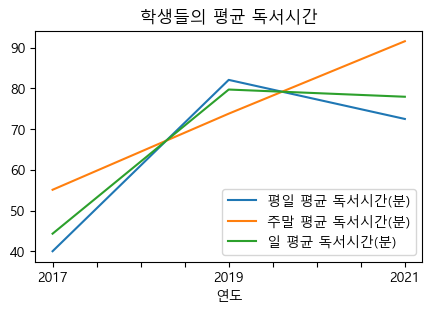

In [182]:
read_avg_stu.iloc[:,0:3].plot(figsize=(5,3), title='학생들의 평균 독서시간')

- 학생들의 주말 평균 독서시간은 꾸준한 증가세를 보인다.

- 학생들의 일 평균 독서 시간과 평일 평균 독서 시간은 2019년에 크게 증가하였으나, 2021년에 감소세를 보인다.

<AxesSubplot:title={'center':'종이책 평균 독서시간'}, xlabel='연도'>

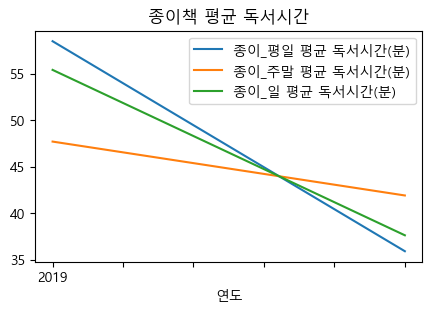

In [183]:
read_avg_stu.iloc[1:3,3:6].plot(figsize=(5,3), title='종이책 평균 독서시간')

<AxesSubplot:title={'center':'전자책 평균 독서시간'}, xlabel='연도'>

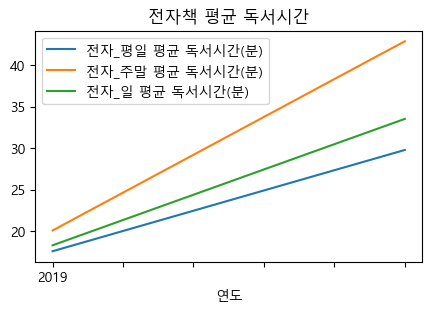

In [184]:
read_avg_stu.iloc[1:3,6:9].plot(figsize=(5,3), title='전자책 평균 독서시간')

<AxesSubplot:title={'center':'오디오북 평균 독서시간'}, xlabel='연도'>

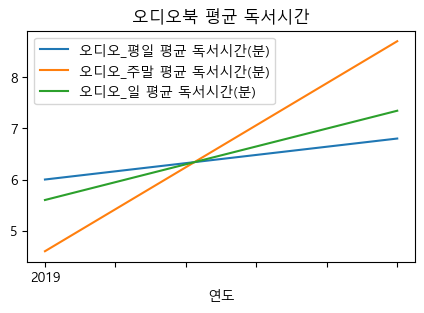

In [185]:
read_avg_stu.iloc[1:3,9:12].plot(figsize=(5,3), title='오디오북 평균 독서시간')

----------------------------------

------------------------------------

### 코로나 19 이후 학생들의 독서 생활 변화

In [186]:
covid_stu_2021 = Stu_covid_2021.loc[:,['종이책', '전자책', '웹소설', '오디오북',
       '총 독서량', '도서관 방문', '전자도서관 이용', '전자책/오디오북/웹소설 구독']]

In [187]:
# 결측치 제거
covid_stu_2021.replace({9:np.nan},inplace=True)
covid_stu_2021.dropna()

,종이책,전자책,웹소설,오디오북,총 독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독
0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
1,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,약간 증가,약간 감소,변함 없음
2,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,매우 증가,변함 없음,변함 없음
3,매우 감소,매우 감소,매우 감소,매우 감소,약간 감소,매우 증가,매우 감소,매우 감소
4,약간 증가,변함 없음,변함 없음,변함 없음,매우 증가,변함 없음,변함 없음,변함 없음
...,...,...,...,...,...,...,...,...
3315,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
3316,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소
3317,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
3318,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음


In [188]:
list = covid_stu_2021.columns
total = pd.DataFrame()

for i in list :
    temp = covid_stu_2021[i].value_counts(normalize=True).round(3)*100
    total = pd.concat([total,temp], axis=1)
    
total = total.T[['매우 감소','약간 감소','변함 없음','약간 증가','매우 증가']]

In [189]:
total

,매우 감소,약간 감소,변함 없음,약간 증가,매우 증가
종이책,6.7,10.7,42.5,28.8,11.3
전자책,10.1,5.4,66.4,11.5,6.5
웹소설,8.8,4.4,58.8,15.4,12.5
오디오북,13.9,4.2,74.5,5.0,2.4
총 독서량,5.4,9.7,37.2,32.3,15.4
도서관 방문,15.0,14.0,45.4,16.9,8.7
전자도서관 이용,15.7,8.7,67.3,5.9,2.5
전자책/오디오북/웹소설 구독,11.0,5.2,67.7,11.2,4.9


In [190]:
# 컬럼 간소화
total['감소'] = total['매우 감소'] + total['약간 감소']
total['증가'] = total['매우 증가'] + total['약간 증가']

total_sim = total.drop(['매우 감소','매우 증가','약간 감소','약간 증가'],axis=1)
total_sim.sort_index(ascending=True, axis=1)

,감소,변함 없음,증가
종이책,17.4,42.5,40.1
전자책,15.5,66.4,18.0
웹소설,13.2,58.8,27.9
오디오북,18.1,74.5,7.4
총 독서량,15.1,37.2,47.7
도서관 방문,29.0,45.4,25.6
전자도서관 이용,24.4,67.3,8.4
전자책/오디오북/웹소설 구독,16.2,67.7,16.1


실제 종이책 독서시간은 크게 감소하였으나, 코로나 이후 독서량이 '증가'했다는 답변이 전체의 40.1%, '변함 없다'는 답변이 42.5%를 차지하고 있다.

또한, 실제 오디오북 독서시간은 증가하였으나, 코로나 이후 오디오북 독서량이 '증가'했다는 답변은 전체의 7.4% 밖에 되지 않는다.


- 독서 장애 요인

In [193]:
# 필요한 컬럼값 추출
reason_not_read = total_stu.loc[:,['연도', '독서장애요인1', '독서장애요인2']]

In [194]:
reason_not_read

,연도,독서장애요인1,독서장애요인2
0,2017,학업 때문에 책읽을시간이 없어서,기타
1,2017,학업 때문에 책읽을시간이 없어서,어떤 책을 읽을지 몰라서
2,2017,기타,책을 읽고 이해하기가 어려워서
3,2017,학업 때문에 책읽을시간이 없어서,읽을 만한 책이 없어서
4,2017,기타,책읽기가 싫고 습관이 들지않아서
...,...,...,...
9770,2021,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서"
9771,2021,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",책읽기가 싫고 습관이 들지않아서
9772,2021,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서"
9773,2021,어떤 책을 읽을지 몰라서,0


In [195]:
# 연도 기준 groupby()
reason_not_read_gr = reason_not_read.groupby('연도')

In [196]:
# 함수 정의 : 독서장애요인 1순위에 가중치 2를 부여, 합산한 값 구하기.
def func_reason_not_read (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    gr.dropna(how='any',inplace=True)
    return gr['독서장애요인1'].value_counts()*2 + gr['독서장애요인2'].value_counts()

In [197]:
# 그룹화 함수 적용
reason_not_read = reason_not_read_gr.apply(func_reason_not_read)

In [198]:
# 다중인덱스 제거
reason_not_read = reason_not_read.unstack(level=1)
reason_not_read.replace({np.nan:0},inplace=True)
# 시리즈 형태를 데이터 프레임으로 변경
reason_not_read =pd.DataFrame(reason_not_read)

In [199]:
reason_not_read

,기타,독서가 필요하다고 생각하지 않아서,부모님이 책읽는 것을 공부라고 생각하지 않으셔서,어떤 책을 읽을지 몰라서,읽을 만한 책이 없어서,책을 빌릴 곳이 없어서,책을 읽고 이해하기가 어려워서,책을 읽을만한 가정환경이 아니어서,책읽기가 싫고 습관이 들지않아서,학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서"
연도,,,,,,,,,,,
2017,384.0,216.0,74.0,668.0,716.0,43.0,213.0,187.0,1971.0,2718.0,2068.0
2019,259.0,0.0,67.0,709.0,737.0,50.0,232.0,168.0,1977.0,2402.0,2213.0
2021,256.0,0.0,59.0,525.0,564.0,79.0,220.0,139.0,3467.0,1957.0,2319.0


In [200]:
# 백분율로 확인하기
reason_not_read_col = reason_not_read.columns
reason_not_read = reason_not_read.div(reason_not_read[reason_not_read_col].sum(axis = 1),axis = 0).round(3)*100
reason_not_read

,기타,독서가 필요하다고 생각하지 않아서,부모님이 책읽는 것을 공부라고 생각하지 않으셔서,어떤 책을 읽을지 몰라서,읽을 만한 책이 없어서,책을 빌릴 곳이 없어서,책을 읽고 이해하기가 어려워서,책을 읽을만한 가정환경이 아니어서,책읽기가 싫고 습관이 들지않아서,학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서"
연도,,,,,,,,,,,
2017,4.1,2.3,0.8,7.2,7.7,0.5,2.3,2.0,21.3,29.4,22.3
2019,2.9,0.0,0.8,8.0,8.4,0.6,2.6,1.9,22.4,27.3,25.1
2021,2.7,0.0,0.6,5.5,5.9,0.8,2.3,1.5,36.2,20.4,24.2


- 2017년 : 학업 때문에 책읽을시간이 없어서 > 휴대전화,인터넷,텔레비전,게임 등을 이용해서 > 책읽기가 싫고 습관이 들지않아서

- 2019년 : 학업 때문에 책읽을시간이 없어서 > 휴대전화,인터넷,텔레비전,게임 등을 이용해서 > 책읽기가 싫고 습관이 들지않아서	

- 2021년 : 책읽기가 싫고 습관이 들지않아서	> 휴대전화,인터넷,텔레비전,게임 등을 이용해서 > 학업 때문에 책읽을시간이 없어서

### 학생

- 종이책/전자책/오디오북 선호 분야 빈도 분석

In [288]:
total_stu.columns

Index(['학교구분', '성별', '학교 소재지', '독서 빈도', '독서장애요인1', '독서장애요인2', '도서 선택시 이용정보1',
       '도서 선택시 이용정보2', '도서 입수경로1', '도서 입수경로2', '초등 독서분야 선호도1', '초등 독서분야 선호도2',
       '초등 독서분야 선호도3', '중고등 독서분야 선호도1', '중고등 독서분야 선호도2', '중고등 독서분야 선호도3',
       '학교 밖 도서관이용경험', '주이용 도서관 종류1', '주이용 도서관 종류2', '이용 이유', '비이용 이유', '연도',
       '독서선호도', '월 평균 이용빈도', '연 평균 이용빈도', '평일 평균 독서시간(분)', '주말 평균 독서시간(분)',
       '종이_평일 평균 독서시간(분)', '종이_주말 평균 독서시간(분)', '전자_평일 평균 독서시간(분)',
       '전자_주말 평균 독서시간(분)', '오디오_평일 평균 독서시간(분)', '오디오_주말 평균 독서시간(분)'],
      dtype='object')

In [289]:
# 필요한 컬럼값 추출 : df.loc[]
book_kind = total_stu.loc[:,['연도','학교구분','초등 독서분야 선호도1', '초등 독서분야 선호도2', '중고등 독서분야 선호도1', '중고등 독서분야 선호도2']]

In [290]:
book_kind

,연도,학교구분,초등 독서분야 선호도1,초등 독서분야 선호도2,중고등 독서분야 선호도1,중고등 독서분야 선호도2
0,2017,초등,"연예, 오락, 스포츠",동화/소설,0,0
1,2017,초등,동화/소설,동화/소설,0,0
2,2017,초등,"역사, 위인전",사회,0,0
3,2017,초등,동화/소설,"연예, 오락, 스포츠",0,0
4,2017,초등,"역사, 위인전","연예, 오락, 스포츠",0,0
...,...,...,...,...,...,...
9770,2021,고등,0,0,0,0
9771,2021,고등,0,0,0,0
9772,2021,고등,0,0,0,0
9773,2021,고등,0,0,0,0


In [291]:
# 인덱스 설정
book_kind = book_kind.set_index('학교구분')

In [292]:
book_kind

,연도,초등 독서분야 선호도1,초등 독서분야 선호도2,중고등 독서분야 선호도1,중고등 독서분야 선호도2
학교구분,,,,,
초등,2017,"연예, 오락, 스포츠",동화/소설,0,0
초등,2017,동화/소설,동화/소설,0,0
초등,2017,"역사, 위인전",사회,0,0
초등,2017,동화/소설,"연예, 오락, 스포츠",0,0
초등,2017,"역사, 위인전","연예, 오락, 스포츠",0,0
...,...,...,...,...,...
고등,2021,0,0,0,0
고등,2021,0,0,0,0
고등,2021,0,0,0,0


In [294]:
book_kind_ele = book_kind.loc['초등']

In [295]:
book_kind_ele

,연도,초등 독서분야 선호도1,초등 독서분야 선호도2,중고등 독서분야 선호도1,중고등 독서분야 선호도2
학교구분,,,,,
초등,2017,"연예, 오락, 스포츠",동화/소설,0,0
초등,2017,동화/소설,동화/소설,0,0
초등,2017,"역사, 위인전",사회,0,0
초등,2017,동화/소설,"연예, 오락, 스포츠",0,0
초등,2017,"역사, 위인전","연예, 오락, 스포츠",0,0
...,...,...,...,...,...
초등,2021,동화/소설,자기계발서,0,0
초등,2021,동화/소설,"역사, 위인전",0,0
초등,2021,0,0,0,0


In [296]:
book_kind_ele_gr = book_kind_ele.groupby('연도')

In [297]:
def func_book_fav (gr) :
    gr.replace({0:np.nan},inplace=True)
    gr.dropna(thresh=3,inplace=True)
    return gr['초등 독서분야 선호도1'].value_counts()*2 + gr['초등 독서분야 선호도2'].value_counts()

In [298]:
book_kind_ele = book_kind_ele_gr.apply(func_book_fav)

In [299]:
book_kind_ele

,과학,그림책,기타,동시/시,동화/소설,사회,수필,"역사, 위인전","연예, 오락, 스포츠","예술, 문화",자기계발서,종교,"철학, 논리",취미
연도,,,,,,,,,,,,,,
2017,204,169,208,36,1025,320,23,389,303,77,45,13,67,304
2019,162,201,163,19,955,310,18,356,325,61,27,18,60,310
2021,208,425,164,55,798,68,11,433,231,103,57,9,68,382


In [ ]:
book_kind_ele

In [300]:
# 백분율로 확인하기
book_kind_ele_col =book_kind_ele.columns
book_kind_ele = book_kind_ele.div(book_kind_ele[book_kind_ele_col].sum(axis = 1),axis = 0).round(3)*100
book_kind_ele

,과학,그림책,기타,동시/시,동화/소설,사회,수필,"역사, 위인전","연예, 오락, 스포츠","예술, 문화",자기계발서,종교,"철학, 논리",취미
연도,,,,,,,,,,,,,,
2017,6.4,5.3,6.5,1.1,32.2,10.1,0.7,12.2,9.5,2.4,1.4,0.4,2.1,9.6
2019,5.4,6.7,5.5,0.6,32.0,10.4,0.6,11.9,10.9,2.0,0.9,0.6,2.0,10.4
2021,6.9,14.1,5.4,1.8,26.5,2.3,0.4,14.4,7.7,3.4,1.9,0.3,2.3,12.7


- 시각화

<AxesSubplot:>

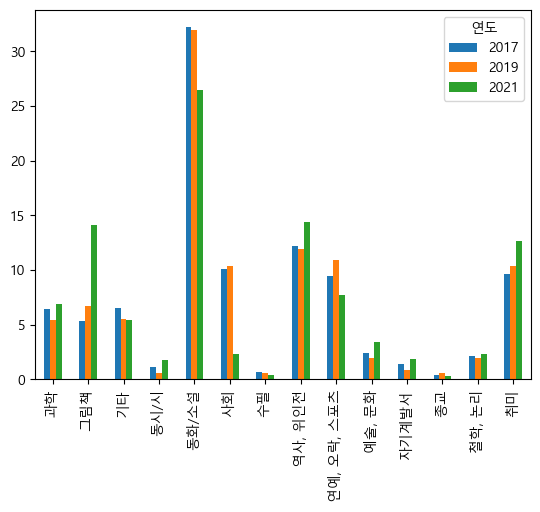

In [302]:
book_kind_ele.T.plot(kind='bar')

### 중등

In [303]:
book_kind_mdl = book_kind.loc['중등']

In [304]:
book_kind_mdl

,연도,초등 독서분야 선호도1,초등 독서분야 선호도2,중고등 독서분야 선호도1,중고등 독서분야 선호도2
학교구분,,,,,
중등,2017,0,0,문학(시/수필),소설
중등,2017,0,0,소설,"역사, 지리"
중등,2017,0,0,소설,"철학, 사상, 종교"
중등,2017,0,0,문학(시/수필),"과학, 기술, 컴퓨터"
중등,2017,0,0,소설,문학(시/수필)
...,...,...,...,...,...
중등,2021,0,0,문학(시/수필),소설
중등,2021,0,0,소설,"역사, 지리"
중등,2021,0,0,소설,"직업, 취업 관련"


In [305]:
book_kind_mdl_gr = book_kind_mdl.groupby('연도')

In [306]:
def func_book_fav (gr) :
    gr.replace({0:np.nan},inplace=True)
    gr.dropna(thresh=3,inplace=True)
    return gr['중고등 독서분야 선호도1'].value_counts()*2 + gr['중고등 독서분야 선호도2'].value_counts()

In [307]:
book_kind_mdl = book_kind_mdl_gr.apply(func_book_fav)

In [308]:
book_kind_mdl

,"가정, 육아, 요리","경제, 경영","과학, 기술, 컴퓨터",기타,문학(시/수필),소설,"어학, 외국어","역사, 지리","연예, 오락, 스포츠, 취미, 여행","예술, 문화",자기계발서,"정치, 사회, 시사","직업, 취업 관련","철학, 사상, 종교"
연도,,,,,,,,,,,,,,
2017,49,37,162,46,542,1097,37,144,316,133,83,45,101,55
2019,41,42,131,67,567,1107,26,112,361,126,80,43,99,48
2021,30,36,225,79,199,1266,39,177,418,136,117,72,138,62


In [309]:
# 백분율로 확인하기
book_kind_mdl_col =book_kind_mdl.columns
book_kind_mdl = book_kind_mdl.div(book_kind_mdl[book_kind_mdl_col].sum(axis = 1),axis = 0).round(3)*100
book_kind_mdl

,"가정, 육아, 요리","경제, 경영","과학, 기술, 컴퓨터",기타,문학(시/수필),소설,"어학, 외국어","역사, 지리","연예, 오락, 스포츠, 취미, 여행","예술, 문화",자기계발서,"정치, 사회, 시사","직업, 취업 관련","철학, 사상, 종교"
연도,,,,,,,,,,,,,,
2017,1.7,1.3,5.7,1.6,19.0,38.5,1.3,5.1,11.1,4.7,2.9,1.6,3.5,1.9
2019,1.4,1.5,4.6,2.4,19.9,38.8,0.9,3.9,12.7,4.4,2.8,1.5,3.5,1.7
2021,1.0,1.2,7.5,2.6,6.6,42.3,1.3,5.9,14.0,4.5,3.9,2.4,4.6,2.1


- 시각화

<AxesSubplot:xlabel='연도'>

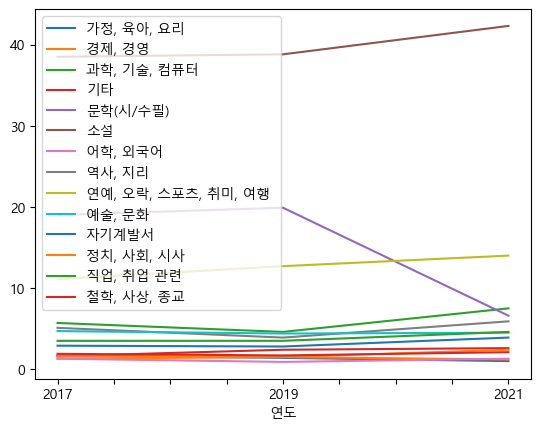

In [312]:
book_kind_mdl.plot()

### 고등

In [313]:
book_kind_high = book_kind.loc['고등']

In [314]:
book_kind_high

,연도,초등 독서분야 선호도1,초등 독서분야 선호도2,중고등 독서분야 선호도1,중고등 독서분야 선호도2
학교구분,,,,,
고등,2017,0,0,"역사, 지리",소설
고등,2017,0,0,"과학, 기술, 컴퓨터",문학(시/수필)
고등,2017,0,0,"과학, 기술, 컴퓨터",소설
고등,2017,0,0,0,0
고등,2017,0,0,소설,"철학, 사상, 종교"
...,...,...,...,...,...
고등,2021,0,0,0,0
고등,2021,0,0,0,0
고등,2021,0,0,0,0


In [315]:
book_kind_high_gr = book_kind_high.groupby('연도')

In [306]:
def func_book_fav (gr) :
    gr.replace({0:np.nan},inplace=True)
    gr.dropna(thresh=3,inplace=True)
    return gr['중고등 독서분야 선호도1'].value_counts()*2 + gr['중고등 독서분야 선호도2'].value_counts()

In [316]:
book_kind_high = book_kind_high_gr.apply(func_book_fav)

In [317]:
book_kind_high

,"가정, 육아, 요리","경제, 경영","과학, 기술, 컴퓨터",기타,문학(시/수필),소설,"어학, 외국어","역사, 지리","연예, 오락, 스포츠, 취미, 여행","예술, 문화",자기계발서,"정치, 사회, 시사","직업, 취업 관련","철학, 사상, 종교"
연도,,,,,,,,,,,,,,
2017,45,80,203,36,633,1105,41,96,217,115,197,129,175,99
2019,28,70,285,27,459,883,21,79,190,107,129,71,185,67
2021,33,102,220,30,268,1145,31,107,287,121,148,94,229,107


In [318]:
# 백분율로 확인하기
book_kind_high_col = book_kind_high.columns
book_kind_high =book_kind_high.div(book_kind_high[book_kind_high_col].sum(axis = 1),axis = 0).round(3)*100
book_kind_high

,"가정, 육아, 요리","경제, 경영","과학, 기술, 컴퓨터",기타,문학(시/수필),소설,"어학, 외국어","역사, 지리","연예, 오락, 스포츠, 취미, 여행","예술, 문화",자기계발서,"정치, 사회, 시사","직업, 취업 관련","철학, 사상, 종교"
연도,,,,,,,,,,,,,,
2017,1.4,2.5,6.4,1.1,20.0,34.8,1.3,3.0,6.8,3.6,6.2,4.1,5.5,3.1
2019,1.1,2.7,11.0,1.0,17.6,33.9,0.8,3.0,7.3,4.1,5.0,2.7,7.1,2.6
2021,1.1,3.5,7.5,1.0,9.2,39.2,1.1,3.7,9.8,4.1,5.1,3.2,7.8,3.7


- 시각화

<AxesSubplot:xlabel='연도'>

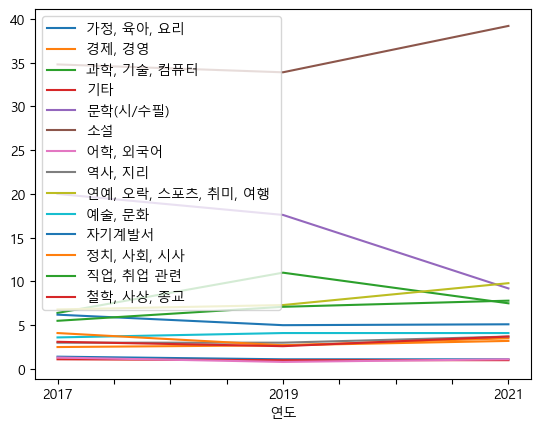

In [319]:
book_kind_high.plot()

- 종이책/전자책/오디오북 선호 분야 연도별 변화 시각화

------------------------------------

------------------------------------

------------------------------------

### 성인

### 성인의 종이책/전자책/오디오북 평균 독서 시간과 총 평균 독서 시간

그룹화 : group_by()

In [156]:
# 연도별 그룹화
adult_gr = total_adult.groupby('연도')
adult_gr

In [157]:
# 연도별 독서시간 평균값 데이터프레임
read_avg_adult = adult_gr.mean().round(1).drop(['월 평균 이용빈도','연 평균 이용빈도'],axis=1)

In [158]:
read_avg_adult

,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분)
연도,,,,,,,,
2017,21.9,24.3,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,22.0,19.0,5.5,4.4,1.1,0.8
2021,0.0,0.0,11.7,15.8,6.0,8.8,1.2,1.3


In [159]:
#2019,2021년 종류별 독서시간 -> 전체 독서시간
for i in range(1,3):
    for j in range(2) :
        read_avg_adult.iloc[i,j] = read_avg_adult.iloc[i,j+2] + read_avg_adult.iloc[i,j+4] + read_avg_adult.iloc[i,j+6]
    
read_avg_adult

,평일 평균 독서시간(분),주말 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분)
연도,,,,,,,,
2017,21.9,24.3,0.0,0.0,0.0,0.0,0.0,0.0
2019,28.6,24.2,22.0,19.0,5.5,4.4,1.1,0.8
2021,18.9,25.9,11.7,15.8,6.0,8.8,1.2,1.3


In [160]:
# 종류별 평일/주말 평균 독서시간 -> 일 평균 독서시간 추출
read_avg_adult.insert(2,'일 평균 독서시간(분)',(read_avg_adult.iloc[:,0]*5 + read_avg_adult.iloc[:,1]*2)/7)
read_avg_adult.insert(5,'종이_일 평균 독서시간(분)',(read_avg_adult.iloc[:,3]*5 + read_avg_adult.iloc[:,4]*2)/7)
read_avg_adult.insert(8,'전자_일 평균 독서시간(분)',(read_avg_adult.iloc[:,6]*5 + read_avg_adult.iloc[:,7]*2)/7)
read_avg_adult.insert(11,'오디오_일 평균 독서시간(분)',(read_avg_adult.iloc[:,9]*5 + read_avg_adult.iloc[:,10]*2)/7)

read_avg_adult.round(1)

,평일 평균 독서시간(분),주말 평균 독서시간(분),일 평균 독서시간(분),종이_평일 평균 독서시간(분),종이_주말 평균 독서시간(분),종이_일 평균 독서시간(분),전자_평일 평균 독서시간(분),전자_주말 평균 독서시간(분),전자_일 평균 독서시간(분),오디오_평일 평균 독서시간(분),오디오_주말 평균 독서시간(분),오디오_일 평균 독서시간(분)
연도,,,,,,,,,,,,
2017,21.9,24.3,22.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,28.6,24.2,27.3,22.0,19.0,21.1,5.5,4.4,5.2,1.1,0.8,1.0
2021,18.9,25.9,20.9,11.7,15.8,12.9,6.0,8.8,6.8,1.2,1.3,1.2


------------------------------------

### 연도별 독서시간 변화 시각화 : line.plot()

<AxesSubplot:title={'center':'성인들의 평균 독서시간'}, xlabel='연도'>

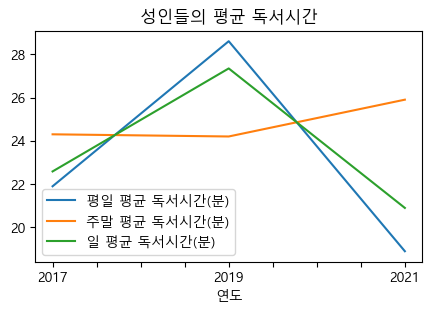

In [161]:
read_avg_adult.iloc[:,0:3].plot(figsize=(5,3), title='성인들의 평균 독서시간')

- 2017년과 2019년 성인들의 주말 평균 독서시간은 유사하나 2021년에 소폭 증가세를 보인다.

- 성인들의 일 평균 독서 시간과 평일 평균 독서 시간은 2019년에 크게 증가하였으나, 2021년에 큰 감소세를 보여 3개년 중 최저를 기록했다.

<AxesSubplot:title={'center':'종이책 평균 독서시간'}, xlabel='연도'>

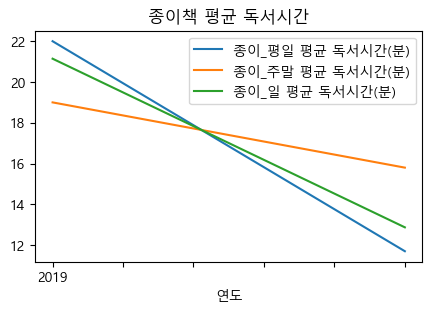

In [162]:
read_avg_adult.iloc[1:3,3:6].plot(figsize=(5,3), title='종이책 평균 독서시간')

<AxesSubplot:title={'center':'전자책 평균 독서시간'}, xlabel='연도'>

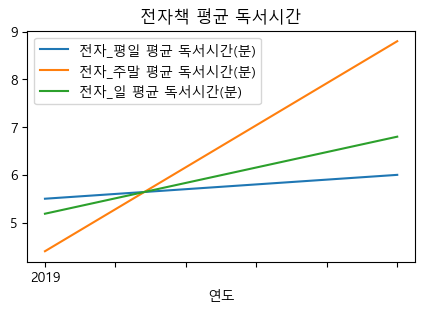

In [163]:
read_avg_adult.iloc[1:3,6:9].plot(figsize=(5,3), title='전자책 평균 독서시간')

<AxesSubplot:title={'center':'오디오북 평균 독서시간'}, xlabel='연도'>

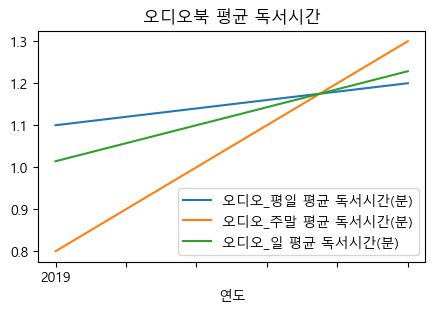

In [164]:
read_avg_adult.iloc[1:3,9:12].plot(figsize=(5,3), title='오디오북 평균 독서시간')

### 코로나 19 이후 독서 생활 변화

In [165]:
covid_2021 = Adult_covid_2021.loc[:,['종이책', '전자책', '웹소설', '오디오북',
       '총 독서량', '도서관 방문', '전자도서관 이용', '전자책/오디오북/웹소설 구독']]

In [166]:
list = covid_2021.columns
total = pd.DataFrame()

for i in list :
    temp = covid_2021[i].value_counts(normalize=True).round(3)*100
    total = pd.concat([total,temp], axis=1)
    
total = total.T[['매우 감소','약간 감소','변함 없음','약간 증가','매우 증가']]

In [167]:
total

,매우 감소,약간 감소,변함 없음,약간 증가,매우 증가
종이책,3.1,10.8,72.1,13.2,0.8
전자책,2.4,3.0,85.2,8.7,0.6
웹소설,2.3,2.6,88.2,6.3,0.5
오디오북,2.1,2.1,93.1,2.2,0.4
총 독서량,2.5,8.9,75.8,11.9,0.9
도서관 방문,4.8,8.4,83.1,3.5,0.2
전자도서관 이용,3.4,4.0,90.8,1.7,0.0
전자책/오디오북/웹소설 구독,3.7,1.4,94.7,0.3,NaN


In [168]:
# 컬럼 간소화
total['감소'] = total['매우 감소'] + total['약간 감소']
total['증가'] = total['매우 증가'] + total['약간 증가']

total_sim = total.drop(['매우 감소','매우 증가','약간 감소','약간 증가'],axis=1)
total_sim.sort_index(ascending=True, axis=1)

,감소,변함 없음,증가
종이책,13.9,72.1,14.0
전자책,5.4,85.2,9.3
웹소설,4.9,88.2,6.8
오디오북,4.2,93.1,2.6
총 독서량,11.4,75.8,12.8
도서관 방문,13.2,83.1,3.7
전자도서관 이용,7.4,90.8,1.7
전자책/오디오북/웹소설 구독,5.1,94.7,NaN


array([<AxesSubplot:ylabel='종이책'>], dtype=object)

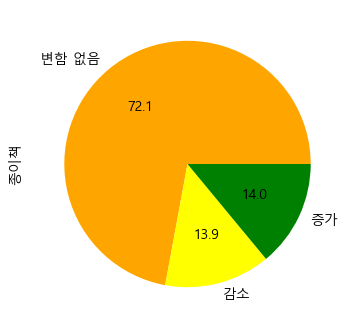

In [169]:
total_sim.T.종이책.plot.pie(figsize=(4,4), 
               colors=['orange','yellow','green'],
               subplots=True,
               autopct='%.1f',
               fontsize=10)

실제 종이책 독서시간은 크게 감소하였으나, 코로나 이후 독서량이 '감소'했다는 답변은 전체의 13.9% 밖에 되지 않는다.

또한, 실제 오디오북 독서시간은 증가하였으나, 코로나 이후 오디오북 독서량이 '증가'했다는 답변은 전체의 2.6% 밖에 되지 않는다.

- 독서 장애 요인

In [201]:
# 필요한 컬럼값 추출
reason_not_read = total_adult.loc[:,['연도', '독서장애요인1', '독서장애요인2']]

In [202]:
reason_not_read

,연도,독서장애요인1,독서장애요인2
0,2017,여가/취미활동,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용"
1,2017,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,여가/취미활동
2,2017,일 또는 학업 때문에 책읽을시간이 없어서,0
3,2017,일 또는 학업 때문에 책읽을시간이 없어서,어떤 책을 읽을지 몰라서
4,2017,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용"
...,...,...,...
17995,2021,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용"
17996,2021,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동
17997,2021,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동
17998,2021,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용"


In [203]:
# 연도 기준 groupby()
reason_not_read_gr = reason_not_read.groupby('연도')

In [204]:
# 함수 정의 : 독서장애요인 1순위에 가중치 2를 부여, 합산한 값 구하기.
def func_reason_not_read (gr) :
    gr.replace({9:np.nan,0:np.nan},inplace=True)
    gr.dropna(how='any',inplace=True)
    return gr['독서장애요인1'].value_counts()*2 + gr['독서장애요인2'].value_counts()

In [205]:
# 그룹화 함수 적용
reason_not_read = reason_not_read_gr.apply(func_reason_not_read)

In [206]:
# 다중인덱스 제거
reason_not_read = reason_not_read.unstack(level=1)
reason_not_read.replace({np.nan:0},inplace=True)
# 시리즈 형태를 데이터 프레임으로 변경
reason_not_read =pd.DataFrame(reason_not_read)

In [207]:
reason_not_read

,글자가 잘 보이지 않아서,기타,독서의 필요성을 느끼지 못해서,몸이 불편하여 책 읽기가 어려워서,어떤 책을 읽을지 몰라서,여가/취미활동,육아 또는 타인 때문에,일 또는 학업 때문에 책읽을시간이 없어서,책 구입이 경제적으로 부담되어서,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,책을 읽고 이해하기가 어려워서,책을 읽을만한 마음의 여유가 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용"
연도,,,,,,,,,,,,,
2017,0.0,28.0,687.0,557.0,477.0,2868.0,43.0,5654.0,88.0,2202.0,208.0,1410.0,3406.0
2019,0.0,268.0,649.0,501.0,255.0,2150.0,0.0,4825.0,141.0,2332.0,246.0,885.0,5046.0
2021,1355.0,0.0,837.0,203.0,215.0,1232.0,0.0,4808.0,200.0,3031.0,273.0,906.0,4715.0


In [208]:
# 백분율로 확인하기
reason_not_read_col = reason_not_read.columns
reason_not_read = reason_not_read.div(reason_not_read[reason_not_read_col].sum(axis = 1),axis = 0).round(3)*100
reason_not_read

,글자가 잘 보이지 않아서,기타,독서의 필요성을 느끼지 못해서,몸이 불편하여 책 읽기가 어려워서,어떤 책을 읽을지 몰라서,여가/취미활동,육아 또는 타인 때문에,일 또는 학업 때문에 책읽을시간이 없어서,책 구입이 경제적으로 부담되어서,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,책을 읽고 이해하기가 어려워서,책을 읽을만한 마음의 여유가 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용"
연도,,,,,,,,,,,,,
2017,0.0,0.2,3.9,3.2,2.7,16.3,0.2,32.1,0.5,12.5,1.2,8.0,19.3
2019,0.0,1.5,3.8,2.9,1.5,12.4,0.0,27.9,0.8,13.5,1.4,5.1,29.2
2021,7.6,0.0,4.7,1.1,1.2,6.9,0.0,27.0,1.1,17.1,1.5,5.1,26.5


- 2017년 : 일 또는 학업 때문에 책읽을시간이 없어서 > 휴대전화,인터넷,텔레비전,게임 등 콘텐트 이용 > 여가/취미활동

- 2019년 : 휴대전화,인터넷,텔레비전,게임 등 콘텐트 이용 > 일 또는 학업 때문에 책읽을시간이 없어서 > 책읽기가 싫고 습관이 들지않아서	

- 2021년 : 일 또는 학업 때문에 책읽을시간이 없어서 > 휴대전화,인터넷,텔레비전,게임 등을 이용해서 > 책읽기가 싫고 습관이 들지않아서	


## - 종이책/전자책 선호 분야 빈도 분석

In [320]:
total_adult.columns

Index(['지역', '연령', '성별', '독서 빈도', '독서장애요인1', '독서장애요인2', '도서 선택시 이용정보1',
       '도서 선택시 이용정보2', '도서 입수경로1', '도서 입수경로2', '종이책 선호분야1', '종이책 선호분야2',
       '전자책 선호분야1', '전자책 선호분야2', '도서관 이용경험', '주이용 도서관 종류1', '월 평균 이용빈도',
       '연 평균 이용빈도', '이용 목적', '비이용 이유', '최종학력', '연도', '독서 선호도', '주이용 도서관 종류2',
       '평일 평균 독서시간(분)', '주말 평균 독서시간(분)', '종이_평일 평균 독서시간(분)',
       '종이_주말 평균 독서시간(분)', '전자_평일 평균 독서시간(분)', '전자_주말 평균 독서시간(분)',
       '오디오_평일 평균 독서시간(분)', '오디오_주말 평균 독서시간(분)'],
      dtype='object')

In [323]:
# 필요한 컬럼값 추출 : df.loc[]
book_kind = total_adult.loc[:,['연도','종이책 선호분야1', '종이책 선호분야2','전자책 선호분야1', '전자책 선호분야2']]

In [324]:
book_kind

,연도,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2
0,2017,소설(장르소설 포함),"정치, 사회, 시사",0,0
1,2017,문학,"취미, 오락, 여행, 건강",0,0
2,2017,0,0,0,0
3,2017,문학,소설(장르소설 포함),0,0
4,2017,"어학, 외국어",소설(장르소설 포함),0,0
...,...,...,...,...,...
17995,2021,"과학, 기술, 컴퓨터",문학,0,0
17996,2021,0,0,소설(장르소설 포함),"취미, 오락, 여행, 건강"
17997,2021,재테크,"역사, 지리",0,0
17998,2021,문학,문학,0,0


## 종이책

In [327]:
book_kind_paper_gr = book_kind.groupby('연도')

In [330]:
def func_book_fav (gr) :
    gr.replace({0:np.nan},inplace=True)
    gr.dropna(thresh=3,inplace=True)
    return gr['종이책 선호분야1'].value_counts()*2 + gr['종이책 선호분야2'].value_counts()

In [331]:
book_kind_paper = book_kind_paper_gr.apply(func_book_fav)

In [332]:
book_kind_paper

,"가정, 육아, 요리","경제, 경영","과학, 기술, 컴퓨터",기타,문학,소설(장르소설 포함),"어학, 외국어","역사, 지리","예술, 문화",자기계발서,재테크,"정치, 사회, 시사","철학, 사상, 종교","취미, 오락, 여행, 건강"
연도,,,,,,,,,,,,,,
2017,509,736,143,12,2879,1393,198,335,332,890,195,404,1007,880
2019,365,556,127,29,2536,1246,130,209,191,899,227,342,597,853
2021,307,404,199,6,1114,1797,252,338,129,585,533,409,448,501


In [333]:
# 백분율로 확인하기
book_kind_paper_col = book_kind_paper.columns
book_kind_paper =book_kind_paper.div(book_kind_paper[book_kind_paper_col].sum(axis = 1),axis = 0).round(3)*100
book_kind_paper

,"가정, 육아, 요리","경제, 경영","과학, 기술, 컴퓨터",기타,문학,소설(장르소설 포함),"어학, 외국어","역사, 지리","예술, 문화",자기계발서,재테크,"정치, 사회, 시사","철학, 사상, 종교","취미, 오락, 여행, 건강"
연도,,,,,,,,,,,,,,
2017,5.1,7.4,1.4,0.1,29.0,14.1,2.0,3.4,3.3,9.0,2.0,4.1,10.2,8.9
2019,4.4,6.7,1.5,0.3,30.5,15.0,1.6,2.5,2.3,10.8,2.7,4.1,7.2,10.3
2021,4.4,5.8,2.8,0.1,15.9,25.6,3.6,4.8,1.8,8.3,7.6,5.8,6.4,7.1


- 시각화

<AxesSubplot:>

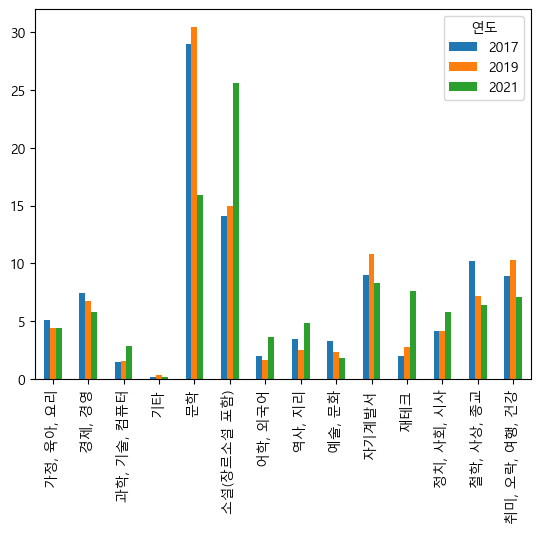

In [336]:
book_kind_paper.T.plot(kind='bar')

## 전자책

In [337]:
book_kind_e_gr = book_kind.groupby('연도')

In [338]:
def func_book_fav (gr) :
    gr.replace({0:np.nan},inplace=True)
    gr.dropna(thresh=3,inplace=True)
    return gr['전자책 선호분야1'].value_counts()*2 + gr['전자책 선호분야2'].value_counts()

In [339]:
book_kind_e = book_kind_e_gr.apply(func_book_fav)

In [340]:
book_kind_e

,"가정, 육아, 요리","경제, 경영","과학, 기술, 컴퓨터",기타,문학,소설(장르소설 포함),"어학, 외국어","역사, 지리","예술, 문화",자기계발서,재테크,"정치, 사회, 시사","철학, 사상, 종교","취미, 오락, 여행, 건강"
연도,,,,,,,,,,,,,,
2017,50.0,74.0,40.0,NaN,336.0,820.0,82.0,65.0,39.0,93.0,65.0,113.0,100.0,131.0
2019,60.0,126.0,62.0,5.0,447.0,761.0,99.0,81.0,50.0,176.0,90.0,150.0,99.0,253.0
2021,109.0,141.0,61.0,NaN,316.0,1412.0,124.0,95.0,138.0,173.0,125.0,74.0,139.0,267.0


In [343]:
# 백분율로 확인하기
book_kind_e_col = book_kind_e.columns
book_kind_e =book_kind_e.div(book_kind_e[book_kind_e_col].sum(axis = 1),axis = 0).round(3)*100

In [344]:
# 결측치 제거
book_kind_e = book_kind_e.fillna(0)
book_kind_e

,"가정, 육아, 요리","경제, 경영","과학, 기술, 컴퓨터",기타,문학,소설(장르소설 포함),"어학, 외국어","역사, 지리","예술, 문화",자기계발서,재테크,"정치, 사회, 시사","철학, 사상, 종교","취미, 오락, 여행, 건강"
연도,,,,,,,,,,,,,,
2017,2.5,3.7,2.0,0.0,16.7,40.9,4.1,3.2,1.9,4.6,3.2,5.6,5.0,6.5
2019,2.4,5.1,2.5,0.2,18.2,30.9,4.0,3.3,2.0,7.2,3.7,6.1,4.0,10.3
2021,3.4,4.4,1.9,0.0,10.0,44.5,3.9,3.0,4.3,5.5,3.9,2.3,4.4,8.4


- 시각화

<AxesSubplot:>

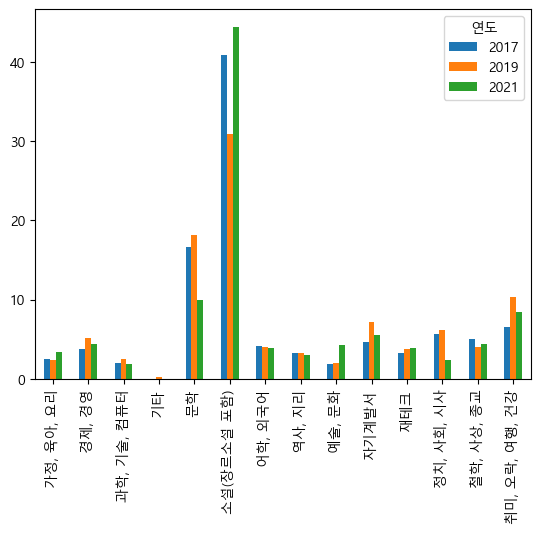

In [345]:
book_kind_e.T.plot(kind='bar')

------------------------------------

- (2021년) 코로나 이후 전자책 이용 행태 빈도 분석

In [235]:
# 필요한 컬럼값 추출
ebook = ebook_adult.loc[:,['연도', '전자책 이용이유1','전자책 이용이유2', '전자책 이용방식1', '전자책 이용방식2']]

In [244]:
ebook

,연도,전자책 이용이유1,전자책 이용이유2,전자책 이용방식1,전자책 이용방식2
2,2021,무료로 이용할 수 있어서,보관과 휴대가 편리해서,구매 이용,대여 이용
6,2021,보관과 휴대가 편리해서,시간과 장소에 관계없이 이용할 수 있어서,구매 이용,무료 이용
7,2021,보관과 휴대가 편리해서,정기구독 서비스로 무제한 이용이 가능해서,정기구독 이용,구매 이용
8,2021,보관과 휴대가 편리해서,정기구독 서비스로 무제한 이용이 가능해서,무료 이용,구매 이용
9,2021,보관과 휴대가 편리해서,시간과 장소에 관계없이 이용할 수 있어서,무료 이용,구매 이용
...,...,...,...,...,...
5898,2021,종이책에 없는 콘텐츠여서,정기구독 서비스로 무제한 이용이 가능해서,정기구독 이용,무료 이용
5921,2021,종이책에 없는 콘텐츠여서,좋아하는 콘텐츠가 많아서,무료 이용,정기구독 이용
5989,2021,무료로 이용할 수 있어서,다양한 기능들이 편리해서,무료 이용,대여 이용
5991,2021,종이책보다 가격이 저렴해서,시간과 장소에 관계없이 이용할 수 있어서,무료 이용,정기구독 이용


In [261]:
# 전자책 이용이유 1순위에 가중치 2를 부여, 합산한 값 구하기.
ebook.replace({0:np.nan},inplace=True)
ebook.dropna(how='any',inplace=True)
reason_ebook = ebook['전자책 이용이유1'].value_counts()*2 + ebook['전자책 이용이유2'].value_counts()

In [262]:
# 시리즈 -> 데이터프레임
reason_ebook = pd.DataFrame(reason_ebook)

In [263]:
# 행 <-> 열
reason_ebook = reason_ebook.T
reason_ebook = reason_ebook.fillna(0)

In [264]:
reason_ebook

,다른 일을 하면서 동시에 이용할 수 있어서,다양한 기능들이 편리해서,무료로 이용할 수 있어서,보관과 휴대가 편리해서,부담 없이 즐길 수 있어서,시간과 장소에 관계없이 이용할 수 있어서,시간을 보내려고,인터넷이나 앱으로 손쉽게 접할 수 있어서,정기구독 서비스로 무제한 이용이 가능해서,종이책보다 가격이 저렴해서,종이책보다 세련되고 멋져서,종이책에 없는 콘텐츠여서,좋아하는 콘텐츠가 많아서
0,0.0,60.0,282.0,974.0,90.0,704.0,14.0,65.0,36.0,116.0,17.0,105.0,128.0


In [265]:
# 백분율로 확인하기
reason_ebook_col = reason_ebook.columns
reason_ebook = reason_ebook.div(reason_ebook[reason_ebook_col].sum(axis = 1),axis = 0).round(3)*100
reason_ebook

,다른 일을 하면서 동시에 이용할 수 있어서,다양한 기능들이 편리해서,무료로 이용할 수 있어서,보관과 휴대가 편리해서,부담 없이 즐길 수 있어서,시간과 장소에 관계없이 이용할 수 있어서,시간을 보내려고,인터넷이나 앱으로 손쉽게 접할 수 있어서,정기구독 서비스로 무제한 이용이 가능해서,종이책보다 가격이 저렴해서,종이책보다 세련되고 멋져서,종이책에 없는 콘텐츠여서,좋아하는 콘텐츠가 많아서
0,0.0,2.3,10.9,37.6,3.5,27.2,0.5,2.5,1.4,4.5,0.7,4.1,4.9


전자책을 이용하는 이유는 **보관과 휴대가 편리해서 > 시간과 장소에 관계없이 이용할 수 있어서 > 무료로 이용할 수 있어서** 순으로 나타났다.

- 전자책을 이용하는 방식

In [270]:
# 전자책 이용방식 1순위에 가중치 2를 부여, 합산한 값 구하기.
ebook.replace({0:np.nan},inplace=True)
ebook.dropna(how='any',inplace=True)
how_ebook = ebook['전자책 이용방식1'].value_counts()*2 + ebook['전자책 이용방식2'].value_counts()

In [271]:
# 시리즈 -> 데이터프레임
how_ebook = pd.DataFrame(how_ebook)

In [272]:
# 행 <-> 열
how_ebook = how_ebook.T
how_ebook = how_ebook.fillna(0)

In [273]:
how_ebook

,구매 이용,대여 이용,무료 이용,정기구독 이용
0,1048,241,1121,182


In [274]:
# 백분율로 확인하기
how_ebook_col = how_ebook.columns
how_ebook = how_ebook.div(how_ebook[how_ebook_col].sum(axis = 1),axis = 0).round(3)*100
how_ebook

,구매 이용,대여 이용,무료 이용,정기구독 이용
0,40.4,9.3,43.2,7.0


전자책을 이용하는 방식은 **무료 이용 > 구매 이용 > 대여 이용 > 정기구독 이용** 순으로 나타났다.

---------------------------------------

## 5. 결론

---------------------------------------

### 1) 작은 도서관의 운영 실태 파악

### ①기초 운영 실태 분석

### ②이용자 분석

### ③장서 분석

---------------------

### 2) 공공 도서관

### ①기초 운영 실태 분석

### ②이용자 분석

### ③장서 분석